# Analyzing galaxies in the Boötes field from NDWFS and LoTSS data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time
start_time=time()

In [2]:
path = "/home/bruno/Documents/COSMOamautas/Data/"

## Opening file and reading data onto a dataframe

### The following table includes galaxies already selected as having good quality data and not hosting luminous AGN, and cross-matched with the radio catalog from LoTSS Deep Fields DR1

In [5]:
# Selecting columns to read:
columns = ['RA_1','DEC_1','Z_BEST','z','Mass_median_2','Ks_flux','NUV_rest','R_rest_2','J_rest_2','F_MIPS_24','FErr_MIPS_24_u','FErr_MIPS_24_l','F_PACS_100','F_PACS_160','F_SPIRE_250','F_SPIRE_350','F_SPIRE_500','Peak_flux']
start_time1 = time()
# Reading the data:
bootes = pd.read_csv(path+'Bootes/bootes_matched_new_radio.csv',usecols=columns)
end_time1 = time()
print(f"Creating dataframe took {end_time1-start_time1:.4g} seconds!")
bootes.info()
print(f"Number of galaxies in catalogue: {len(bootes)}")

Creating dataframe took 51.55 seconds!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838900 entries, 0 to 838899
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   RA_1            838900 non-null  float64
 1   DEC_1           838900 non-null  float64
 2   Ks_flux         838900 non-null  float64
 3   F_MIPS_24       771887 non-null  float64
 4   FErr_MIPS_24_u  771887 non-null  float64
 5   FErr_MIPS_24_l  771887 non-null  float64
 6   F_PACS_100      250987 non-null  float64
 7   F_PACS_160      250987 non-null  float64
 8   F_SPIRE_250     261337 non-null  float64
 9   F_SPIRE_350     261337 non-null  float64
 10  F_SPIRE_500     261337 non-null  float64
 11  Z_BEST          838900 non-null  float64
 12  z               838900 non-null  float64
 13  Mass_median_2   834684 non-null  float64
 14  R_rest_2        838663 non-null  float64
 15  J_rest_2        838663 non-null  float64
 16  NUV_rest        8

## OPTIONAL
Only if there is a file containing the saved indices of a previously selected sample, use the following to open such file and filter the full dataframe according to the indices.
Then you can move on to the stacking section, but be sure not to skip the cells that add new columns to the dataframe.

In [6]:
numbers = pd.read_csv(path+'Bootes/Bootes_selected_indexes_2.csv')

bootes = bootes.loc[list(numbers['numbers'])]
print(f"Number of galaxies in catalogue: {len(bootes)}")
bootes

Number of galaxies in catalogue: 387581


RA_1      DEC_1   Ks_flux  F_MIPS_24  FErr_MIPS_24_u  \
27793   216.498264  32.494760  3.512863  -7.441053       -2.831475   
27808   216.491652  32.494870  6.181403  11.109215       23.679974   
27829   216.489419  32.494971  1.501215 -11.090959       -2.741589   
27866   216.496723  32.495209  5.548010   9.220480       19.309473   
27972   216.491105  32.495926  5.102733 -10.782438       -2.970707   
...            ...        ...       ...        ...             ...   
833269  217.995299  35.804064  1.071928  27.646477       42.682102   
833304  218.557253  35.804428  1.085415  -4.466178       -1.149568   
833312  217.947791  35.804478  1.947029  -2.566529       -0.637030   
833414  218.501095  35.805385  1.369673 -47.910187      -26.298004   
833436  217.958148  35.805601  1.946982  50.933136       67.629330   

        FErr_MIPS_24_l  F_PACS_100  F_PACS_160  F_SPIRE_250  F_SPIRE_350  \
27793       -16.825075         NaN         NaN          NaN          NaN   
27808         3.154676         NaN         NaN          NaN          NaN   
27829       -23.543840         NaN         NaN          NaN          NaN   
27866         2.528946         NaN         NaN          NaN          NaN   
27972       -24.083656         NaN         NaN          NaN          NaN   
...                ...         ...         ...          ...          ...   
833269       13.780249    5.296590   14.674137     4.646380     3.017802   
833304      -11.405637         NaN         NaN          NaN          NaN   
833312       -6.369608         NaN         NaN          NaN          NaN   
833414      -69.547730         NaN         NaN          NaN          NaN   
833436       34.708590    3.331983    7.581618     2.078657     2.833087   

        F_SPIRE_500  Z_BEST       z  Mass_median_2   R_rest_2   J_rest_2  \
27793           NaN  0.9440  0.9440       9.241641 -19.496592 -19.691084   
27808           NaN  1.3521  1.3521       9.248381 -19.441881 -19.973963   
27829           NaN  1.0198  1.0198       9.604297 -20.407099 -20.566385   
27866           NaN  1.0496  1.0496       9.420806 -19.973715 -20.101397   
27972           NaN  0.9136  0.9136       9.250130 -19.613028 -19.905160   
...             ...     ...     ...            ...        ...        ...   
833269     3.908505  1.0425  1.0425      10.111774 -20.995420 -22.049204   
833304          NaN  1.4180  1.4180      10.177112 -20.444960 -21.743998   
833312          NaN  0.5235  0.5235       9.291525 -19.021177 -19.492975   
833414          NaN  0.9100  0.9100       9.648840 -20.200373 -21.095670   
833436     2.549019  0.8978  0.8978       9.946227 -20.493280 -21.145655   

         NUV_rest  Peak_flux  
27793  -17.930940        NaN  
27808  -18.652987        NaN  
27829  -18.807463        NaN  
27866  -18.509367        NaN  
27972  -18.369253        NaN  
...           ...        ...  
833269 -18.591307        NaN  
833304 -17.932550        NaN  
833312 -16.895422        NaN  
833414 -18.237356        NaN  
833436 -17.731890        NaN  

[387581 rows x 18 columns]

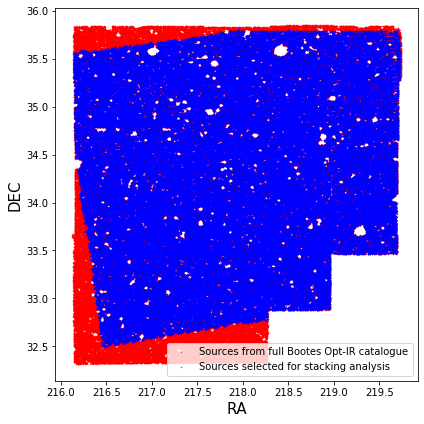

In [7]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('RA',size=15)
ax.set_ylabel('DEC',size=15)
ax.scatter(bootes['RA_1'],bootes['DEC_1'],s=0.1,color='r',label='Sources from full Bootes Opt-IR catalogue')
ax.scatter(bootes_1['RA_1'],bootes_1['DEC_1'],s=0.1,color='b',label='Sources selected for stacking analysis')
ax.legend(numpoints=1,loc='best')
fig.tight_layout()
plt.show()

## Getting rid of invalid values

Since we will be selecting galaxies based on their rest-frame NUV-R and R-J colors, we shall first discard those entries with invalid values in these fields, such as 'nan' or 'inf', as well as those with negative fluxes in the Ks band. We will also exclude sources with invalid (<0) redshift values.

In [4]:
pd.options.mode.use_inf_as_na = True
bootes.dropna(subset=['NUV_rest','R_rest_2','J_rest_2','z','Z_BEST'],inplace=True)
bootes = bootes[(bootes['Ks_flux']>0) & (bootes['Z_BEST']>0)]# & (bootes['Z_BEST']<=1)]
print(f"Number of galaxies in sample: {len(bootes)}")

Number of galaxies in sample: 682474


In [5]:
print(np.count_nonzero(~np.isfinite(bootes['Mass_median_2'])))
print(np.count_nonzero(~np.isfinite(bootes['Z_BEST'])))

3782
0


 A small number of sources are missing stellar mass estimates. Here we will also get rid of those.

In [6]:
bootes.dropna(subset=['Mass_median_2'],inplace=True)
print(f"Number of galaxies in sample: {len(bootes)}")

Number of galaxies in sample: 678692


## Redshift and stellar mass distribution

We can take a look at the distribution of important properties of the galaxies in our sample, such as redshift and stellar mass.

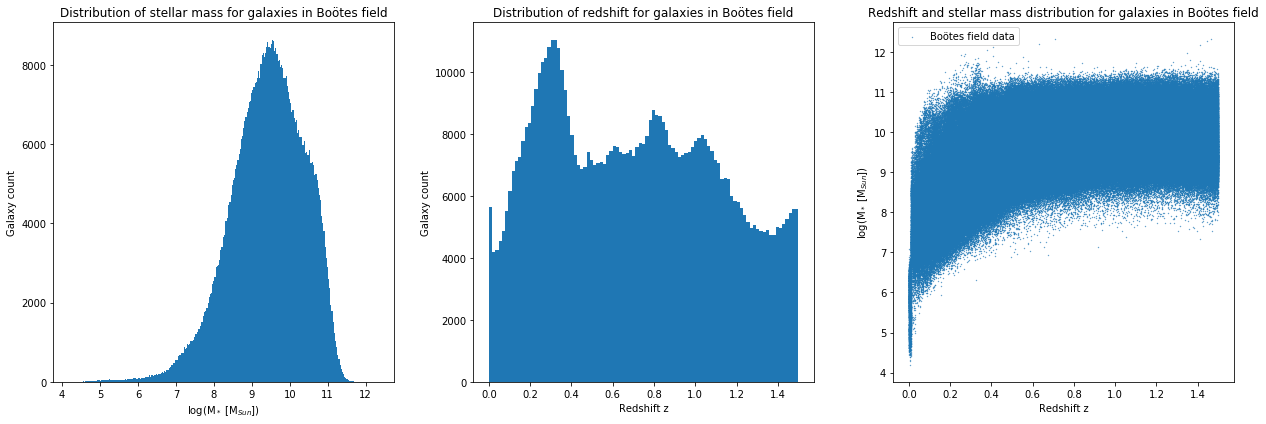

In [9]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
# Plotting stellar mass histogram
ax[0].set_title('Distribution of stellar mass for galaxies in Boötes field')
ax[0].set_xlabel('log(M$_*$ [M$_{\odot}$])')
ax[0].set_ylabel('Galaxy count')
ax[0].hist(bootes['Mass_median_2'], 'auto')
# Plotting redshift histogram
ax[1].set_title('Distribution of redshift for galaxies in Boötes field')
ax[1].set_xlabel('Redshift z')
ax[1].set_ylabel('Galaxy count')
ax[1].hist(bootes['z'], 'auto')
# Plotting Stellar mass vs Redshift
ax[2].set_title('Redshift and stellar mass distribution for galaxies in Boötes field')
ax[2].set_xlabel("Redshift z",fontsize=10)
ax[2].set_ylabel("log(M$_*$ [M$_{\odot}$])",fontsize=10)
ax[2].scatter(bootes['z'],bootes['Mass_median_2'],s=0.1,label='Boötes field data')
ax[2].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

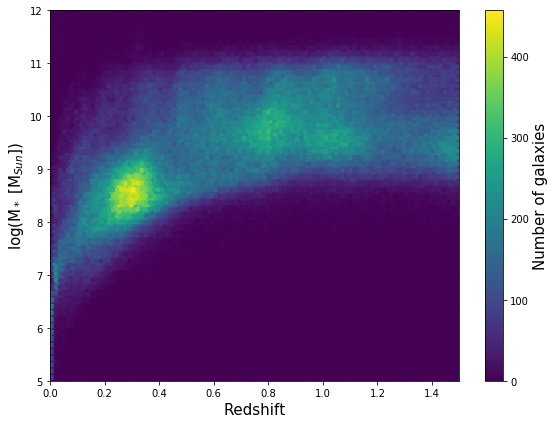

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
# Plotting Ks magnitude vs Redshift
ax.set_xlabel("Redshift",fontsize=15)
ax.set_ylabel("log(M$_*$ [M$_{\odot}$])",fontsize=15)
hb = ax.hexbin(bootes.loc[(bootes['Mass_median_2']>5)&(bootes['Mass_median_2']<12),'z'],
               bootes.loc[(bootes['Mass_median_2']>5)&(bootes['Mass_median_2']<12),'Mass_median_2'],label='Boötes field data')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Number of galaxies',fontsize=15)
ax.set_xlim(xmin=0,xmax=1.5)
ax.set_ylim(ymin=5,ymax=12)
fig.tight_layout()
plt.show()

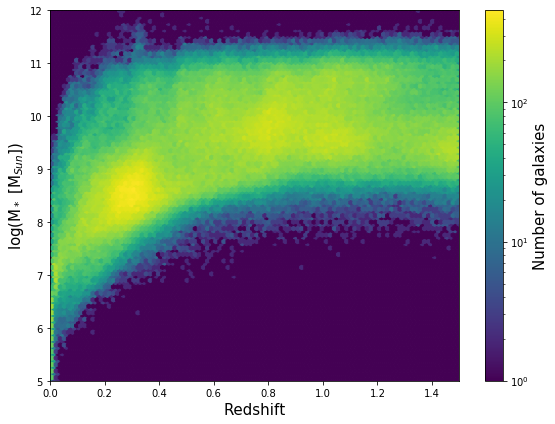

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
# Plotting Ks magnitude vs Redshift
ax.set_xlabel("Redshift",fontsize=15)
ax.set_ylabel("log(M$_*$ [M$_{\odot}$])",fontsize=15)
hb = ax.hexbin(bootes.loc[(bootes['Mass_median_2']>5)&(bootes['Mass_median_2']<12),'z'],
               bootes.loc[(bootes['Mass_median_2']>5)&(bootes['Mass_median_2']<12),'Mass_median_2'],
               bins='log',label='Boötes field data')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Number of galaxies',fontsize=15)
ax.set_xlim(xmin=0,xmax=1.5)
ax.set_ylim(ymin=5,ymax=12)
fig.tight_layout()
plt.show()

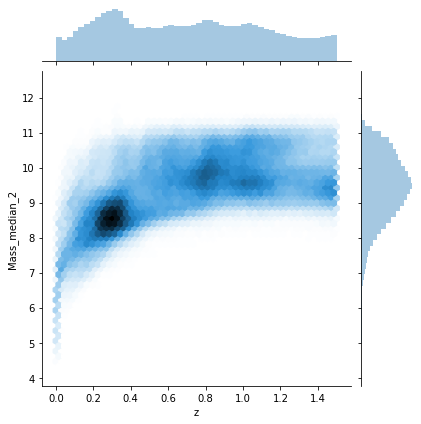

In [12]:
sns.jointplot(x=bootes['z'], y=bootes['Mass_median_2'], kind="hex")#, color="k")

## Ks magnitude distribution

We can also check the distribution of galaxies according to their flux and magnitude in the Ks band. To obtain the magnitudes in the AB system, we shall create a function to perform the appropriate conversion.

In [11]:
def uJyToAB(fluxuJy):
    '''Converts flux in micro Jansky to AB magnitude, with a zeropoint of ~ 3631 Jansky
    Conversion taken from www.star.bristol.ac.uk/~mbt/stilts/sun256/uk.ac.starlink.ttools.func.Fluxes.html'''
    return 23.9-2.5*np.log10(fluxuJy) #2.5*(23+6-np.log10(fluxuJy))-48.6

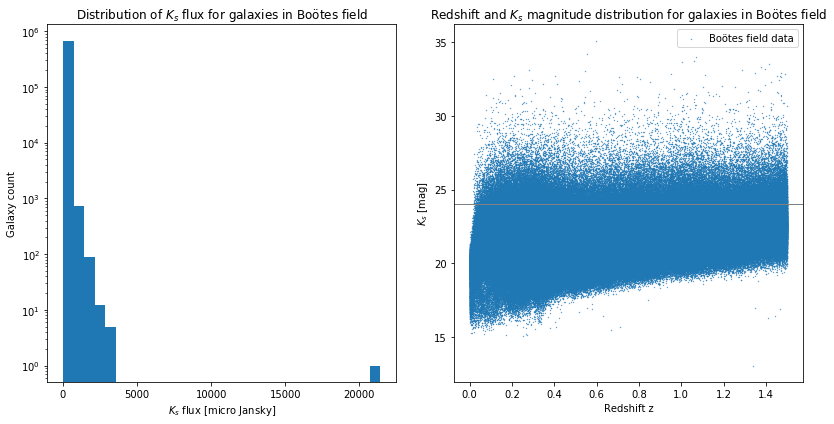

In [19]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
# Plotting Ks flux histogram
ax[0].set_title('Distribution of $K_s$ flux for galaxies in Boötes field')
ax[0].set_xlabel('$K_s$ flux [micro Jansky]')
ax[0].set_ylabel('Galaxy count')
ax[0].set_yscale('log')
ax[0].hist(bootes['Ks_flux'], bins=30)#'auto')
# Plotting Ks magnitude vs Redshift
ax[1].set_title('Redshift and $K_s$ magnitude distribution for galaxies in Boötes field')
ax[1].set_xlabel("Redshift z",fontsize=10)
ax[1].set_ylabel("$K_s$ [mag]",fontsize=10)
ax[1].scatter(bootes['z'],uJyToAB(bootes['Ks_flux']),s=0.1,label='Boötes field data')
ax[1].axhline(24,color='0.5',linewidth=1)
ax[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Because the colors have saturated in the scatter plot, using a 2D histogram allows us to appreciate better the distribution of redshifts and magnitudes.

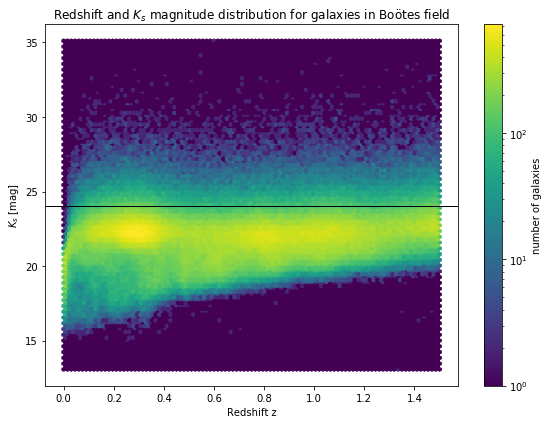

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
# Plotting Ks magnitude vs Redshift
ax.set_title('Redshift and $K_s$ magnitude distribution for galaxies in Boötes field')
ax.set_xlabel("Redshift z",fontsize=10)
ax.set_ylabel("$K_s$ [mag]",fontsize=10)
hb = ax.hexbin(bootes['z'],uJyToAB(bootes['Ks_flux']),bins='log',label='Boötes field data')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('number of galaxies')
ax.axhline(24,color='k',linewidth=1)
#ax.legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Following the sample specifications of Ilbert et al. 2013 and Man et al. 2016, we will limit our sample to those galaxies with Ks < 24. As can be seen in the figure above, the majority of the sample is still included after applying this cut.

In [12]:
# Making cut in Ks magnitude
bootes = bootes[uJyToAB(bootes['Ks_flux'])<24]
print(f"Number of galaxies in sample: {len(bootes)}")

Number of galaxies in sample: 617839


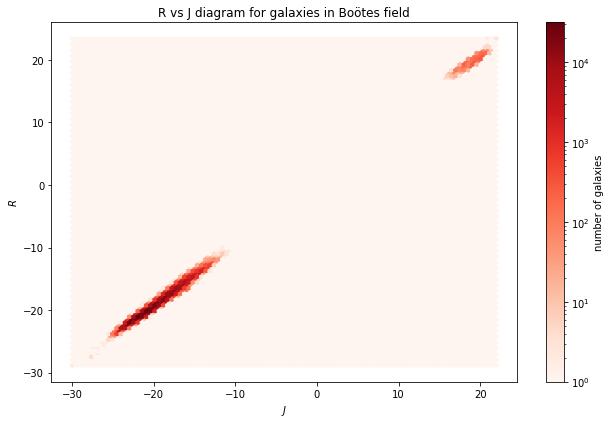

In [23]:
fig, axs = plt.subplots(figsize=(9,6))
axs.set_title('R vs J diagram for galaxies in Boötes field')
axs.set_xlabel(f"$J$",fontsize=10)
axs.set_ylabel(f"$R$",fontsize=10)
hb = axs.hexbin(bootes['J_rest_2'],bootes['R_rest_2'],bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs)
cb.set_label('number of galaxies')
fig.tight_layout()
plt.show()

Here we get rid of the few sources with rest-frame R magnitudes higher than 0, since those are unrealistic for massive galaxies. This will also get rid of sources with rest-frame J magnitudes higher than 0.

In [13]:
# Making cut in R magnitude
bootes = bootes[bootes['R_rest_2']<0]
print(f"Number of galaxies in sample: {len(bootes)}")

Number of galaxies in sample: 613915


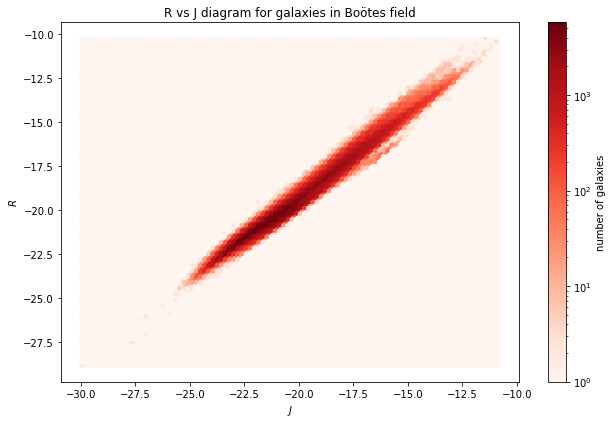

In [26]:
fig, axs = plt.subplots(figsize=(9,6))
axs.set_title('R vs J diagram for galaxies in Boötes field')
axs.set_xlabel(f"$J$",fontsize=10)
axs.set_ylabel(f"$R$",fontsize=10)
hb = axs.hexbin(bootes['J_rest_2'],bootes['R_rest_2'],bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs)
cb.set_label('number of galaxies')
fig.tight_layout()
plt.show()

In [16]:
print(len(bootes))
print(len(bootes[bootes['z']>0.1]))
print(len(bootes[bootes['Mass_median_2']>=9]))

613915
588286
435141


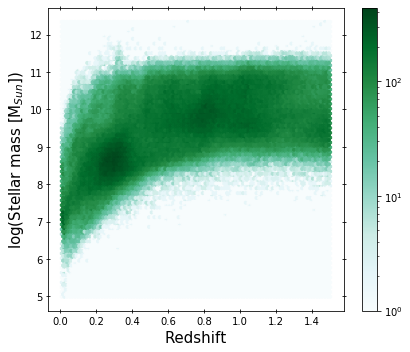

In [15]:
fig, ax = plt.subplots(figsize=(6,5))
bootes.plot.hexbin(x='z',y='Mass_median_2',bins='log',ax=ax)
ax.set_xlabel('Redshift',size=15)
ax.set_ylabel('log(Stellar mass [M$_{\odot}$])',size=15)
#ax.set_xlim(0.1,1.5)
#ax.set_ylim(7,12)
ax.tick_params(which='both',top=True,right=True,direction='inout')
fig.tight_layout()
plt.show()

Because we are interested in studying galaxies at high redshift, here we will discard the entries with redshift values below 0.1. We will exclude galaxies with low values of stellar mass. Previous tests have shown that our analysis is sensitive for sources above 1000,000,000 solar masses, so we will restrict our sample to that range.

In [17]:
bootes = bootes[bootes['z']>0.1]
bootes = bootes[bootes['Mass_median_2']>=7]

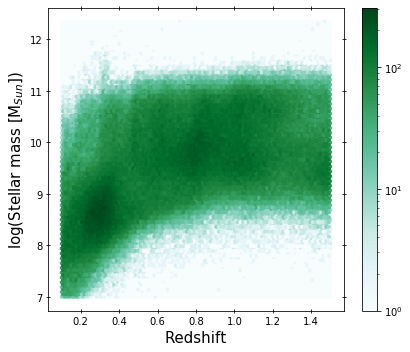

In [18]:
fig, ax = plt.subplots(figsize=(6,5))
bootes.plot.hexbin(x='z',y='Mass_median_2',bins='log',ax=ax)
ax.set_xlabel('Redshift',size=15)
ax.set_ylabel('log(Stellar mass [M$_{\odot}$])',size=15)
#ax.set_xlim(0.1,1.5)
#ax.set_ylim(7,12)
ax.tick_params(which='both',top=True,right=True,direction='inout')
fig.tight_layout()
plt.show()

In [24]:
bootes = bootes[bootes['z']>0.1]
bootes = bootes[bootes['Mass_median_2']>=9]

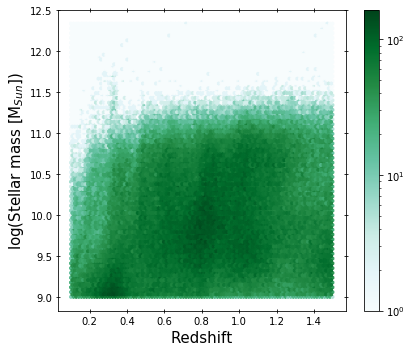

In [25]:
fig, ax = plt.subplots(figsize=(6,5))
bootes.plot.hexbin(x='z',y='Mass_median_2',bins='log',ax=ax)
ax.set_xlabel('Redshift',size=15)
ax.set_ylabel('log(Stellar mass [M$_{\odot}$])',size=15)
#ax.set_xlim(0.1,1.5)
#ax.set_ylim(7,12)
ax.tick_params(which='both',top=True,right=True,direction='inout')
fig.tight_layout()
plt.show()

## Exploring color-color space

By choosing three rest-frame bands (in this case, NUV, R and J), we can define two colors which we will use to select galaxies as quiescent or star-forming. In order to have easy acces to these colors for later operations, we will add two new columns to the table based on the values of other columns.

In [7]:
filter1 = 'NUV'
filter2 = 'R'
filter3 = 'J'
bootes['NUVR'] = bootes['NUV_rest']-bootes['R_rest_2']
bootes['RJ'] = bootes['R_rest_2']-bootes['J_rest_2']

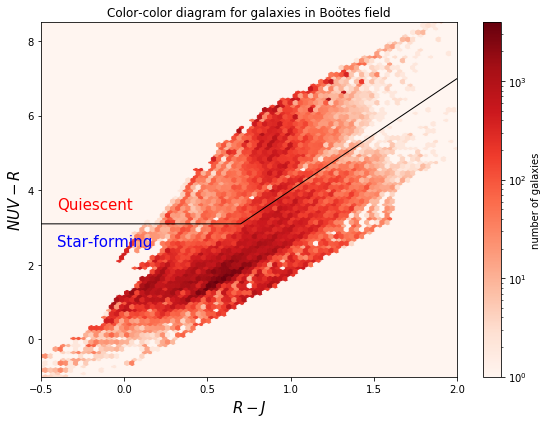

In [20]:
fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('Color-color diagram for galaxies in Boötes field')
axs.set_xlabel(f"${filter2}-{filter3}$",fontsize=15)
axs.set_ylabel(f"${filter1}-{filter2}$",fontsize=15)
hb = axs.hexbin(bootes['RJ'],bootes['NUVR'],bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs)
cb.set_label('number of galaxies')
axs.plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs.set_xlim(xmin=-0.5,xmax=2.)
axs.set_ylim(ymin=-1,ymax=8.5)
axs.text(-0.4,3.5,'Quiescent',size=15,color='r')
axs.text(-0.4,2.5,'Star-forming',size=15,color='b')
fig.tight_layout()
plt.show()

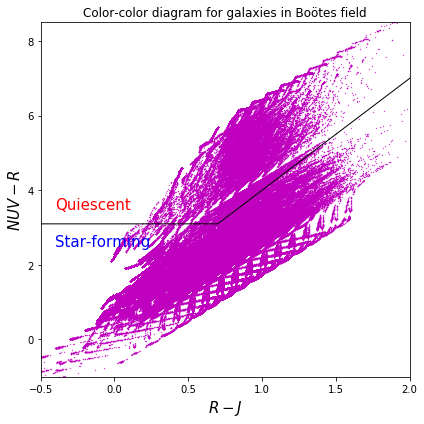

In [21]:
fig, axs = plt.subplots(figsize=(6,6))
axs.set_title('Color-color diagram for galaxies in Boötes field')
axs.set_xlabel(f"${filter2}-{filter3}$",fontsize=15)
axs.set_ylabel(f"${filter1}-{filter2}$",fontsize=15)
axs.scatter(bootes['RJ'],bootes['NUVR'],c='m',s=0.1)
axs.plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs.set_xlim(xmin=-0.5,xmax=2.)
axs.set_ylim(ymin=-1,ymax=8.5)
axs.text(-0.4,3.5,'Quiescent',size=15,color='r')
axs.text(-0.4,2.5,'Star-forming',size=15,color='b')
fig.tight_layout()
plt.show()

We can calculate the fraction of galaxies within the 'quiescent region', and the fraction of those that have viable data at 24 micron from MIPS.

In [8]:
quiescent = '((NUVR>3.1)&(NUVR>3*RJ+1))'
SF = '((NUVR<=3.1)|(NUVR<=3*RJ+1))'
MIPSSNR3 = '(F_MIPS_24>3*(FErr_MIPS_24_u-F_MIPS_24))&(F_MIPS_24>3*(F_MIPS_24-FErr_MIPS_24_l))'
MIPSSNR5 = '(F_MIPS_24>5*(FErr_MIPS_24_u-F_MIPS_24))&(F_MIPS_24>5*(F_MIPS_24-FErr_MIPS_24_l))'

In [23]:
final_sample=len(bootes)
n_quiescent = len(bootes.query(quiescent))
n_star_forming = len(bootes.query(SF))
print(f"Number of galaxies in sample: {final_sample}\n")
print(f"Number of quiescent galaxies in the sample: {n_quiescent}")
q_MIPS = len(bootes.query(quiescent).loc[np.isfinite(bootes['F_MIPS_24']),:])
print(f"Fraction of quiescent galaxies with MIPS data: {q_MIPS/n_quiescent:.2%}")
q_MIPSgt0 = len(bootes.query(quiescent+'&(F_MIPS_24>0)'))
print(f"Fraction of quiescent galaxies with MIPS flux > 0 uJy: {q_MIPSgt0/n_quiescent:.2%}")
q_MIPSSN = len(bootes.query(quiescent+'&'+MIPSSNR3))
print(f"Fraction of quiescent galaxies with MIPS S/N > 3: {q_MIPSSN/n_quiescent:.2%}")
q_MIPSSN = len(bootes.query(quiescent+'&'+MIPSSNR5))
print(f"Fraction of quiescent galaxies with MIPS S/N > 5: {q_MIPSSN/n_quiescent:.2%}\n")
print(f"Number of star-forming galaxies in the sample: {n_star_forming}")
sf_MIPS = len(bootes.query(SF).loc[np.isfinite(bootes['F_MIPS_24']),:])
print(f"Fraction of star-forming galaxies with MIPS data: {sf_MIPS/n_star_forming:.2%}")
sf_MIPSgt0 = len(bootes.query(SF+'&(F_MIPS_24>0)'))
print(f"Fraction of star-forming galaxies with MIPS flux > 0 uJy: {sf_MIPSgt0/n_star_forming:.2%}")
sf_MIPSSN = len(bootes.query(SF+'&'+MIPSSNR3))
print(f"Fraction of star-forming galaxies with MIPS S/N > 3: {sf_MIPSSN/n_star_forming:.2%}")
sf_MIPSSN = len(bootes.query(SF+'&'+MIPSSNR5))
print(f"Fraction of star-forming galaxies with MIPS S/N > 5: {sf_MIPSSN/n_star_forming:.2%}")

Number of galaxies in sample: 586908

Number of quiescent galaxies in the sample: 107260
Fraction of quiescent galaxies with MIPS data: 91.92%
Fraction of quiescent galaxies with MIPS flux > 0 uJy: 74.65%
Fraction of quiescent galaxies with MIPS S/N > 3: 17.99%
Fraction of quiescent galaxies with MIPS S/N > 5: 9.34%

Number of star-forming galaxies in the sample: 479648
Fraction of star-forming galaxies with MIPS data: 92.37%
Fraction of star-forming galaxies with MIPS flux > 0 uJy: 63.67%
Fraction of star-forming galaxies with MIPS S/N > 3: 24.55%
Fraction of star-forming galaxies with MIPS S/N > 5: 16.19%


In [26]:
final_sample=len(bootes)
n_quiescent = len(bootes.query(quiescent))
n_star_forming = len(bootes.query(SF))
print(f"Number of galaxies in sample: {final_sample}\n")
print(f"Number of quiescent galaxies in the sample: {n_quiescent}")
q_MIPS = len(bootes.query(quiescent).loc[np.isfinite(bootes['F_MIPS_24']),:])
print(f"Fraction of quiescent galaxies with MIPS data: {q_MIPS/n_quiescent:.2%}")
q_MIPSgt0 = len(bootes.query(quiescent+'&(F_MIPS_24>0)'))
print(f"Fraction of quiescent galaxies with MIPS flux > 0 uJy: {q_MIPSgt0/n_quiescent:.2%}")
q_MIPSSN = len(bootes.query(quiescent+'&'+MIPSSNR3))
print(f"Fraction of quiescent galaxies with MIPS S/N > 3: {q_MIPSSN/n_quiescent:.2%}")
q_MIPSSN = len(bootes.query(quiescent+'&'+MIPSSNR5))
print(f"Fraction of quiescent galaxies with MIPS S/N > 5: {q_MIPSSN/n_quiescent:.2%}\n")
print(f"Number of star-forming galaxies in the sample: {n_star_forming}")
sf_MIPS = len(bootes.query(SF).loc[np.isfinite(bootes['F_MIPS_24']),:])
print(f"Fraction of star-forming galaxies with MIPS data: {sf_MIPS/n_star_forming:.2%}")
sf_MIPSgt0 = len(bootes.query(SF+'&(F_MIPS_24>0)'))
print(f"Fraction of star-forming galaxies with MIPS flux > 0 uJy: {sf_MIPSgt0/n_star_forming:.2%}")
sf_MIPSSN = len(bootes.query(SF+'&'+MIPSSNR3))
print(f"Fraction of star-forming galaxies with MIPS S/N > 3: {sf_MIPSSN/n_star_forming:.2%}")
sf_MIPSSN = len(bootes.query(SF+'&'+MIPSSNR5))
print(f"Fraction of star-forming galaxies with MIPS S/N > 5: {sf_MIPSSN/n_star_forming:.2%}")

Number of galaxies in sample: 431883

Number of quiescent galaxies in the sample: 93301
Fraction of quiescent galaxies with MIPS data: 91.98%
Fraction of quiescent galaxies with MIPS flux > 0 uJy: 78.45%
Fraction of quiescent galaxies with MIPS S/N > 3: 20.07%
Fraction of quiescent galaxies with MIPS S/N > 5: 10.60%

Number of star-forming galaxies in the sample: 338582
Fraction of star-forming galaxies with MIPS data: 92.35%
Fraction of star-forming galaxies with MIPS flux > 0 uJy: 68.39%
Fraction of star-forming galaxies with MIPS S/N > 3: 31.87%
Fraction of star-forming galaxies with MIPS S/N > 5: 21.97%


## Opening LOFAR and Herschel maps for Bootes field

In [9]:
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy import wcs
#from astropy.wcs.utils import pixel_to_skycoord

In [29]:
# Opening LOFAR map
hdulist = fits.open(path+'Bootes/Maps/BO_image_full_ampphase_di_m.NS_shift.int.facetRestored.blanked.scaled-crop.fits',memmap=True)
w_lofar = wcs.WCS(hdulist[0].header,naxis=2) # TAKE ONLY THE FIRST 2 DIMENSIONS (RA,DEC)

In [30]:
hdulist[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                19845                                                  
NAXIS2  =                19845                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
WCSAXES =                    4 / Number of coordinate axes                      
CRPIX1  =               9923.0 / Pixel coordinate of reference point            
CRPIX2  =               9923.0 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
CRPIX4  =                  1.0 / Pixel coordinate of reference point            
CDELT1  = -0.000416666666666

In [31]:
print(w_lofar)
print("Map unit : ",hdulist[0].header['BUNIT'])
pixscale_lofar = hdulist[0].header['CDELT2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_lofar," arcseconds")
imdata_lofar = hdulist[0].data[0][0] # TAKING ONLY THE FIRST 2 DIMENSIONS (RA,DEC)
hdulist.close()

# Opening SPIRE 250 map
hdulist = fits.open(path+'Bootes/Maps/BOOTES-HerMES-NEST_image_250_SMAP_v6.0.fits',memmap=True)
w_250 = wcs.WCS(hdulist[1].header)

hdulist[1].header

print(w_250)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_250 = hdulist[1].header['CD2_2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_250," arcseconds")
imdata_250 = hdulist[1].data
hdulist.close()

# Opening SPIRE 350 map
hdulist = fits.open(path+'Bootes/Maps/BOOTES-HerMES-NEST_image_350_SMAP_v6.0.fits',memmap=True)
w_350 = wcs.WCS(hdulist[1].header)

hdulist[1].header

print(w_350)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_350 = hdulist[1].header['CD2_2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_350," arcseconds")
imdata_350 = hdulist[1].data
hdulist.close()

# Opening SPIRE 500 map
hdulist = fits.open(path+'Bootes/Maps/BOOTES-HerMES-NEST_image_500_SMAP_v6.0.fits',memmap=True)
w_500 = wcs.WCS(hdulist[1].header)

hdulist[1].header

print(w_500)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_500 = hdulist[1].header['CD2_2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_500," arcseconds")
imdata_500 = hdulist[1].data
hdulist.close()

# Opening PACS 100 map
#hdulist = fits.open(path+'Bootes/Maps/HerMES_PACS_level5_Bootes_HerMES_100um_EdoIbar_Unimap.fits',memmap=True)
hdulist = fits.open(path+'Bootes/Maps/HerMES_PACS_level6_Bootes_NDWFS_100um_EdoIbar_Unimap.fits',memmap=True)
w_100 = wcs.WCS(hdulist[1].header)

hdulist[1].header

print(w_100)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_100 = hdulist[1].header['CDELT2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_100," arcseconds")
imdata_100 = hdulist[1].data
hdulist.close()

# Opening PACS 160 map
#hdulist = fits.open(path+'Bootes/Maps/HerMES_PACS_level5_Bootes_HerMES_160um_EdoIbar_Unimap.fits',memmap=True)
hdulist = fits.open(path+'Bootes/Maps/HerMES_PACS_level6_Bootes_NDWFS_160um_EdoIbar_Unimap.fits',memmap=True)
w_160 = wcs.WCS(hdulist[1].header)

hdulist[1].header

print(w_160)
print("Map unit : ",hdulist[1].header['BUNIT'])
pixscale_160 = hdulist[1].header['CDELT2']*3600 # PIXEL SCALE IN ARCSEC
print("Pixel scale : ",pixscale_160," arcseconds")
imdata_160 = hdulist[1].data
hdulist.close()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 218.0  34.5  
CRPIX : 9923.0  9923.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00041666666666667  0.00041666666666667  
NAXIS : 19845  19845  1  1
Map unit :  Jy/beam
Pixel scale :  1.500000000000012  arcseconds
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 218.154373169  34.1616439819  
CRPIX : 1158.0  1171.0  
CD1_1 CD1_2  : -0.00166666670702  0.0  
CD2_1 CD2_2  : 0.0  0.00166666670702  
NAXIS : 2315  2354
Map unit :  Jy / beam
Pixel scale :  6.000000145272001  arcseconds
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 218.154373169  34.1616439819  
CRPIX : 834.0  843.0  
CD1_1 CD1_2  : -0.00231481483206  0.0  
CD2_1 CD2_2  : 0.0  0.00231481483206  
NAXIS : 1667  1695
Map unit :  Jy / beam
Pixel scale :  8.333333395416  arcseconds
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 218.154373169  34.16

keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


## Removing sources not found in maps

In [10]:
bootes_1 = bootes.copy()

In [35]:
def create_mask(image_data,W,pixscale,FWHM):
    bool_mask=[]
    for ra,dec in zip(bootes_1.loc[:,'RA_1'],bootes_1.loc[:,'DEC_1']):
        world_coords = [ra,dec]                                # world coordinates
        pixel_coords = W.all_world2pix([world_coords], 0)      # pixel coordinates
        position = (pixel_coords[0][0],pixel_coords[0][1])     # position to create cutout
        size = (FWHM*2/pixscale+2, FWHM*2/pixscale+2)          # cutout size in pixels
        try:
            cutout = Cutout2D(image_data, position, size, mode='partial') # create cutout, no trimming
        except:
            bool_mask.append(False)
            continue
        
        if np.isnan(cutout.data).any():
            bool_mask.append(False)
        else:
            bool_mask.append(True)
    return bool_mask

In [36]:
bool_mask = create_mask(imdata_100,w_100,pixscale_100,6.8)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

bootes_1 = bootes_1[bool_mask]
len(bootes_1)

bool_mask = create_mask(imdata_160,w_160,pixscale_160,11.)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

bootes_1 = bootes_1[bool_mask]
len(bootes_1)

bool_mask = create_mask(imdata_250,w_250,pixscale_250,18.2)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

bootes_1 = bootes_1[bool_mask]
len(bootes_1)

bool_mask = create_mask(imdata_350,w_350,pixscale_350,24.9)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

bootes_1 = bootes_1[bool_mask]
len(bootes_1)

bool_mask = create_mask(imdata_500,w_500,pixscale_500,36.3)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

bootes_1 = bootes_1[bool_mask]
len(bootes_1)

bool_mask = create_mask(imdata_lofar,w_lofar,pixscale_lofar,6.)
print(len(bool_mask))
print(np.count_nonzero(bool_mask))

bootes_1 = bootes_1[bool_mask]
len(bootes_1)

431883
407785
407785
405859
405859
390134
390134
389448
389448
387581
387581
387581


387581

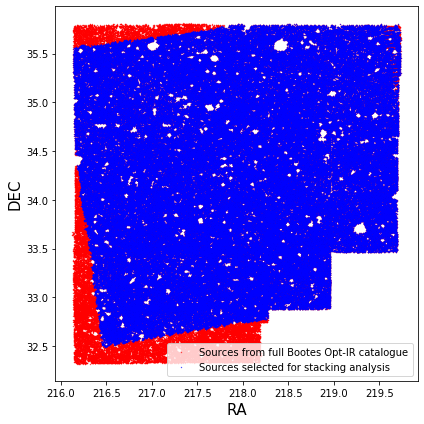

In [39]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('RA',size=15)
ax.set_ylabel('DEC',size=15)
ax.scatter(bootes['RA_1'],bootes['DEC_1'],s=0.1,color='r',label='Sources from full Bootes Opt-IR catalogue')
ax.scatter(bootes_1['RA_1'],bootes_1['DEC_1'],s=0.1,color='b',label='Sources selected for stacking analysis')
ax.legend(numpoints=1,loc='best')
fig.tight_layout()
plt.show()

## Saving indices of selected sample
### BE CAREFUL NOT TO OVERWRITE FILES IN THIS SECTION

Because the selection process can be time-consuming (especially removing individual sources not found on the maps), we will save the indices of the current sample so we can work with it again in the future without having to do the selection all over again.

In [40]:
bootes_1.index.values

array([ 27793,  27808,  27829, ..., 833312, 833414, 833436])

In [42]:
numbers = bootes_1.index.to_frame(name='numbers')

#numbers.to_csv(path+'Bootes/Bootes_selected_indexes_2.csv',index=False)

## Estimating SFRs from MIPS 24 micron flux

Now we will estimate the star formation rate of individually detected galaxies with the 24 micron flux calibration by Rujopakarn et al. 2013.

Here we will define a cosmology entity for use in future calculations

In [12]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [13]:
from scipy.interpolate import interp1d

In [14]:
z = np.array([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8])
Az = np.array([2.656,2.35,2.06,2.012,1.659,1.296,1.137,1.039,1.015,0.934,0.922,0.896,0.837,0.768,0.655])
Bz = np.array([0.975,1.02,1.056,1.065,1.094,1.129,1.159,1.179,1.165,1.149,1.145,1.149,1.158,1.175,1.198])
Az_intrp = interp1d(z, Az, kind='cubic')
Bz_intrp = interp1d(z, Bz, kind='cubic')

In [15]:
def F24_to_LIR(flux, zobj):
    '''Convert Spitzer/MIPS 24 micron flux and redshift to total IR
    luminosity according to Rujopakarn et al. (2013)    
    Input: flux in microJy, redshift
    Output: LIR in Lsun
    '''
    if (~np.isfinite(flux))|(zobj==0):
        return np.nan
    elif flux>0:
        Mpc_to_cm = 3.08568025*(10**24) # 1 Mpc in cm
        microJy_to_Jy = 10**(-6)        # 1 mJy in Jy
        D_L = cosmo.luminosity_distance(zobj).value*Mpc_to_cm # Luminosity distance in cm
        
        logLIR = Az_intrp(zobj) + Bz_intrp(zobj)*(np.log10(flux*microJy_to_Jy*4*np.pi*(D_L**2)) - 45)
        return 10**logLIR
    else:
        return np.nan

def LIR_to_SFR(LIR):
    '''Convert LIR to SFR
    Input: LIR in Lsun
    Output: SFR in Msun/yr (Kroupa 2002 IMF)
    NOTE: This conversion is calibrated for LIR > 5*10^9, if given a lower value it will return an extrapolation
    '''
    if ~np.isfinite(LIR):
        return np.nan
    else:
        L24 = 10**((np.log10(LIR) - 1.096)/0.982)
        
        if (LIR < 1.3*10**12):
            SFR = L24*7.8*10**(-10)
        else:
            SFR = (L24*7.8*10**(-10))*(L24*6.2*10**(-12))**0.048
        return SFR

V_LIR24 = np.vectorize(F24_to_LIR)

In [16]:
#bootes['LIR_24'] = pd.Series([F24_to_LIR(flux,zobj) for flux, zobj in zip(bootes['F_MIPS_24'],bootes['Z_BEST'])],index=bootes.index)
bootes_1['LIR_24'] = V_LIR24(bootes_1['F_MIPS_24'],bootes_1['z'])
#pd.Series([LIR_to_SFR(LIR) for LIR in bootes['LIR_24']])
bootes_1['SFR_24'] = bootes_1['LIR_24'].apply(LIR_to_SFR)

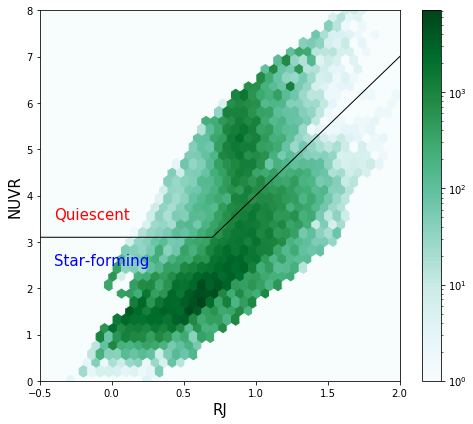

In [49]:
fig, ax = plt.subplots(figsize=(7,6))
ax.set_xlabel('$R - J$',size=15)
ax.set_ylabel('$NUV - R$',size=15)
bootes_1.plot.hexbin(x='RJ',y='NUVR',bins='log',ax=ax,gridsize=50)
ax.plot([-1,0.7,3],[3.1,3.1,10],color='k',linewidth=1,label='Color selection boundary')
ax.text(-0.4,3.5,'Quiescent',size=15,color='r')
ax.text(-0.4,2.5,'Star-forming',size=15,color='b')
ax.set_xlim(-0.5,2)
ax.set_ylim(0,8)
fig.tight_layout()
plt.show()

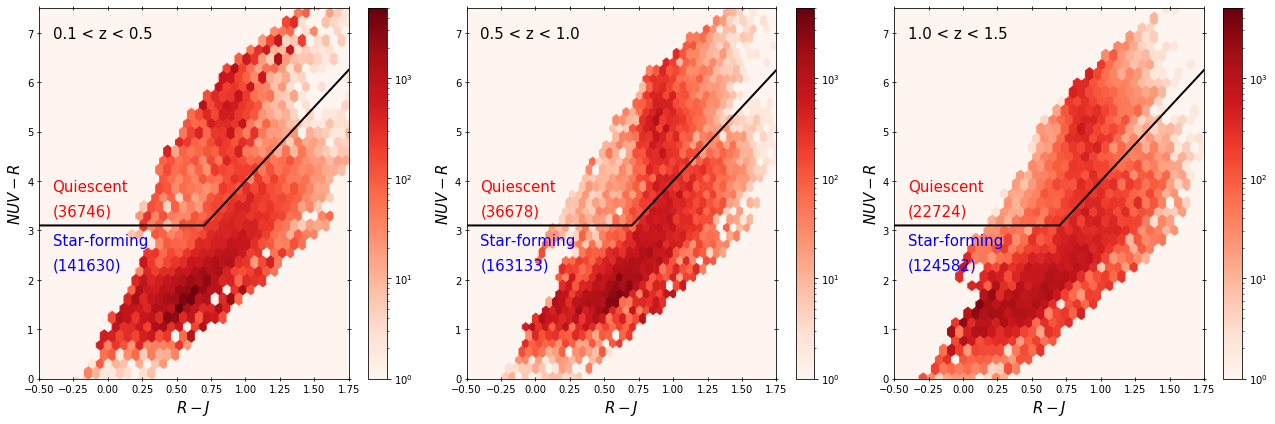

In [58]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2 in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    data.plot.hexbin(x='RJ',y='NUVR',bins='log',ax=ax[i],gridsize=50,vmax=5000,cmap='Reds')
    ax[i].plot([-1,0.7,3],[3.1,3.1,10],color='k',linewidth=2,label='Color selection boundary')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].set_xlabel('$R - J$',size=15)
    ax[i].set_ylabel('$NUV - R$',size=15)
    ax[i].text(-0.4,6.9,f'{z1} < z < {z2}',size=15,color='k')
    ax[i].text(-0.4,3.8,f'Quiescent',size=15,color='r')
    ax[i].text(-0.4,3.3,f'({qg})',size=15,color='r')
    ax[i].text(-0.4,2.7,f'Star-forming',size=15,color='b')
    ax[i].text(-0.4,2.2,f'({sfg})',size=15,color='b')
    ax[i].set_xlim(-0.5,1.75)
    ax[i].set_ylim(0,7.5)
    ax[i].tick_params(which='both',top=True,right=True,direction='inout')
fig.tight_layout()
plt.show()

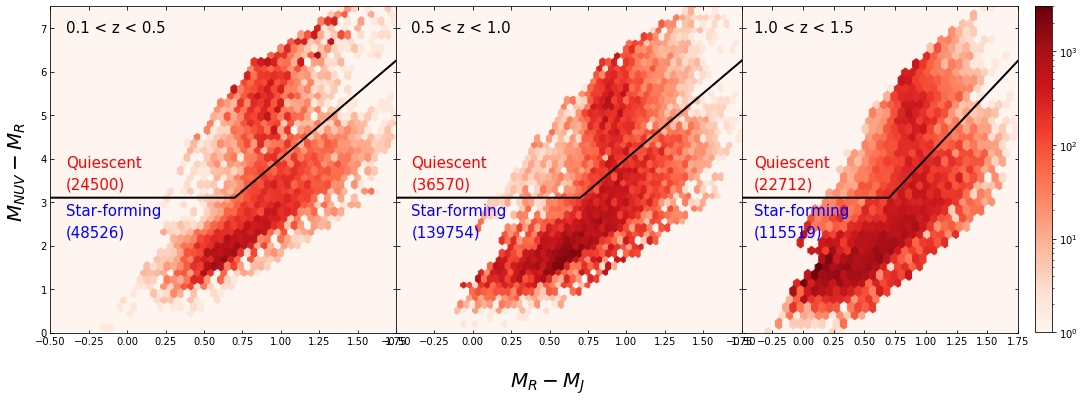

In [17]:
fig, ax = plt.subplots(1,3,figsize=(15,6),sharey='row')
for i, z1, z2 in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    #hb = data.plot.hexbin(x='RJ',y='NUVR',bins='log',ax=ax[i],gridsize=50,vmax=3000,cmap='Reds')
    hb = ax[i].hexbin(data.loc[:,'RJ'],
                      data.loc[:,'NUVR'],
                      cmap='Reds',bins='log',vmax=3000,gridsize=50)
    ax[i].plot([-1,0.7,3],[3.1,3.1,10],color='k',linewidth=2,label='Color selection boundary')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].text(-0.4,6.9,f'{z1} < z < {z2}',size=15,color='k')
    ax[i].text(-0.4,3.8,f'Quiescent',size=15,color='r')
    ax[i].text(-0.4,3.3,f'({qg})',size=15,color='r')
    ax[i].text(-0.4,2.7,f'Star-forming',size=15,color='b')
    ax[i].text(-0.4,2.2,f'({sfg})',size=15,color='b')
    ax[i].set_xlim(-0.5,1.75)
    ax[i].set_ylim(0,7.5)
    ax[i].imshow(np.zeros((50,50)),extent=[-25,25,-25,25],cmap='Reds',aspect='auto')
    ax[i].tick_params(which='both',top=True,right=True,direction='in')
cb = fig.colorbar(hb)
fig.text(0.5, 0.0,'$M_{R} - M_{J}$', ha='center',fontsize=20)
fig.text(0.0, 0.5,'$M_{NUV} - M_{R}$', va='center',fontsize=20, rotation='vertical')
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

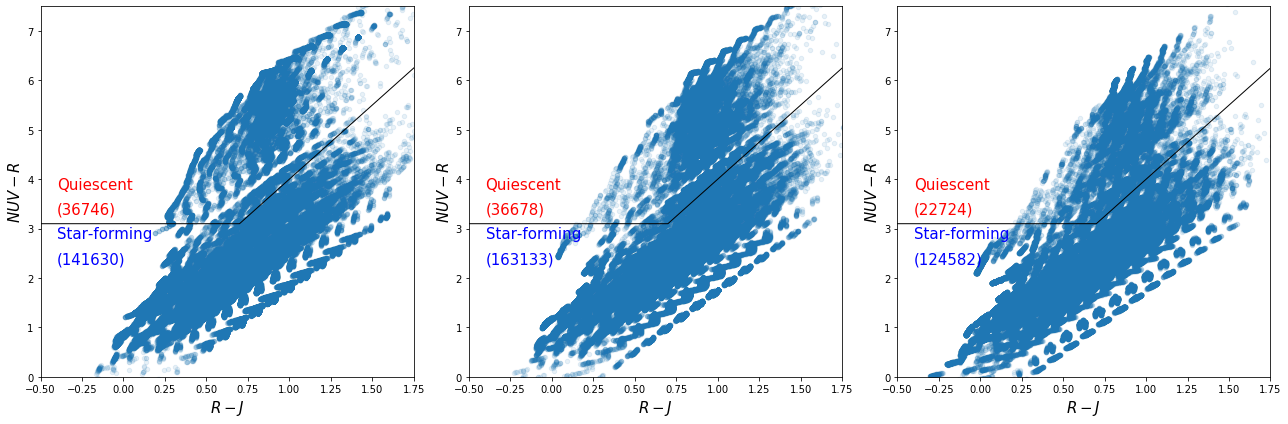

In [70]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2 in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    data.plot.scatter(x='RJ',y='NUVR',ax=ax[i],alpha=0.1)
    ax[i].plot([-1,0.7,3],[3.1,3.1,10],color='k',linewidth=1,label='Color selection boundary')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].set_xlabel('$R - J$',size=15)
    ax[i].set_ylabel('$NUV - R$',size=15)
    ax[i].text(-0.4,3.8,f'Quiescent',size=15,color='r')
    ax[i].text(-0.4,3.3,f'({qg})',size=15,color='r')
    ax[i].text(-0.4,2.8,f'Star-forming',size=15,color='b')
    ax[i].text(-0.4,2.3,f'({sfg})',size=15,color='b')
    ax[i].set_xlim(-0.5,1.75)
    ax[i].set_ylim(0,7.5)
fig.tight_layout()
plt.show()

In [18]:
m = np.arange(7,12.4,0.2)

def SchreiberMS(m1,z): ## For plotting Schreiber+15 main sequence
    return m1-9 - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m1-9 - 0.36-2.5*np.log10(1+z),0.))**2

def SpeagleMS(m1,z): ## For plotting Speagle+14 main sequence:
    age = cosmo.age(z).value
    return (0.84-0.026*age)*m1-6.51+0.11*age

def CarnallQ(m1,z): ## For plotting Carnall+20 sSFR quiescent limit:
    age = cosmo.age(z).value
    return m1+np.log10(0.2/age)-9

We can plot SFR vs stellar mass for the galaxies in our sample. In the following plts I have included the Star Forming Main Sequence as specified by Shreiber 2015, and the quiescent upper sSFR limit from Carnall 2020, both for redshift 0.55.The line indicating log(sSFR) = -11, the upper limit used by Ilbert 2013 for quiescent galaxies, is also shown.

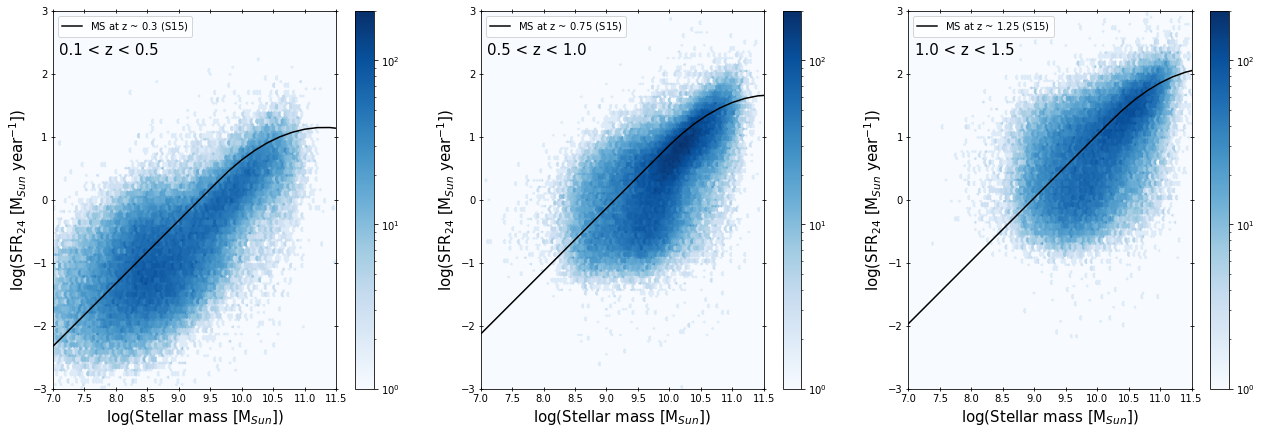

In [55]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2, logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[logSFR1,logSFR2,logSFR3]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    hb = ax[i].hexbin(data.query(SF).loc[:,'Mass_median_2'],
                       np.log10(data.query(SF).loc[:,'SFR_24']),
                       cmap='Blues',bins='log',vmax=200)
    cb = fig.colorbar(hb, ax=ax[i])
    ax[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(z1+z2)/2}$ (S15)')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].set_xlabel('log(Stellar mass [M$_{\odot}$])',size=15)
    ax[i].set_ylabel('log(SFR$_{24}$ [M$_{\odot}$ year$^{-1}$])',size=15)
    ax[i].text(7.1,2.3,f'{z1} < z < {z2}',size=15,color='k')
    ax[i].set_xlim(7,11.5)
    ax[i].set_ylim(-3,3)
    ax[i].imshow(np.zeros((50,50)),extent=[-25,25,-25,25],cmap='Blues')
    ax[i].tick_params(which='both',top=True,right=True,direction='inout')
    ax[i].legend(loc='upper left')
fig.tight_layout()
plt.show()

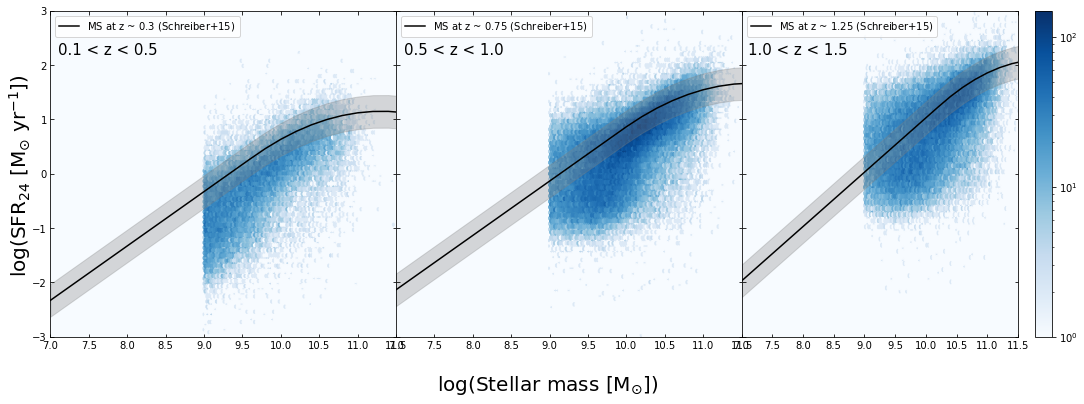

In [22]:
fig, ax = plt.subplots(1,3,figsize=(15,6),sharey='row')
for i, z1, z2 in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (z1+z2)/2
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    hb = ax[i].hexbin(data.query(SF).loc[:,'Mass_median_2'],
                       np.log10(data.query(SF).loc[:,'SFR_24']),
                       cmap='Blues',bins='log',vmax=150)
    #cb = fig.colorbar(hb)
    ax[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    ax[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.3,color='grey')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].text(7.1,2.2,f'{z1} < z < {z2}',size=15,color='k')
    ax[i].set_xlim(7,11.5)
    ax[i].set_ylim(-3,3)
    ax[i].imshow(np.zeros((50,50)),extent=[-25,25,-25,25],cmap='Blues',aspect='auto')
    ax[i].tick_params(which='both',top=True,right=True,direction='in')
    ax[i].legend(loc='upper left')
cb = fig.colorbar(hb)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=20)
fig.text(0.0, 0.5,"log(SFR$_{24}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=20, rotation='vertical')
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

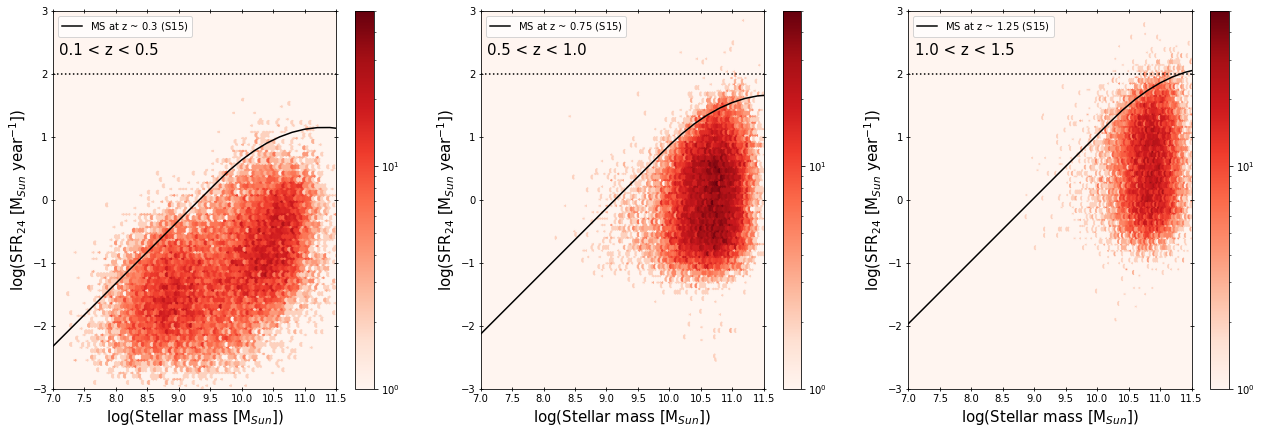

In [56]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2, logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[logSFR1,logSFR2,logSFR3]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    hb = ax[i].hexbin(data.query(quiescent).loc[:,'Mass_median_2'],
                       np.log10(data.query(quiescent).loc[:,'SFR_24']),
                       cmap='Reds',bins='log',vmax=50)
    cb = fig.colorbar(hb, ax=ax[i])
    ax[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(z1+z2)/2}$ (S15)')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].set_xlabel('log(Stellar mass [M$_{\odot}$])',size=15)
    ax[i].set_ylabel('log(SFR$_{24}$ [M$_{\odot}$ year$^{-1}$])',size=15)
    ax[i].text(7.1,2.3,f'{z1} < z < {z2}',size=15,color='k')
    ax[i].set_xlim(7,11.5)
    ax[i].set_ylim(-3,3)
    ax[i].imshow(np.zeros((50,50)),extent=[-25,25,-25,25],cmap='Reds')
    ax[i].tick_params(which='both',top=True,right=True,direction='inout')
    ax[i].legend(loc='upper left')
    ax[i].plot([7,11.5],[2,2],ls=':',color='k')
fig.tight_layout()
plt.show()

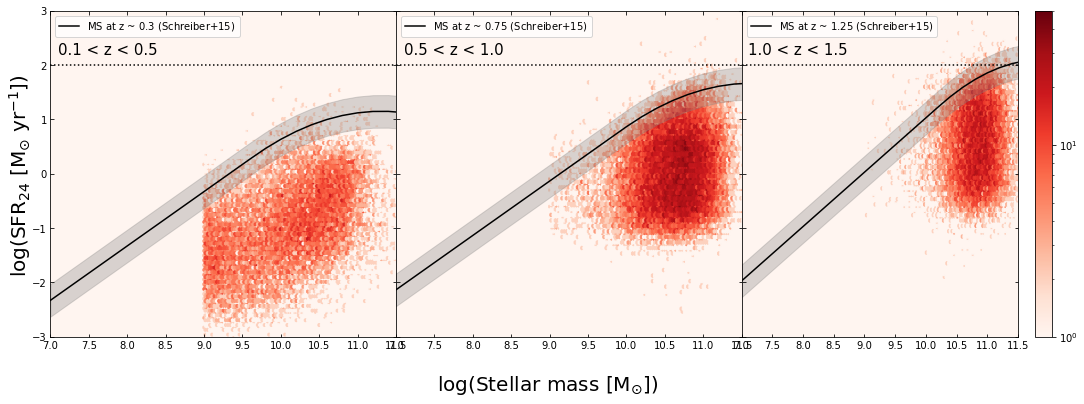

In [21]:
fig, ax = plt.subplots(1,3,figsize=(15,6),sharey='row')
for i, z1, z2 in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (z1+z2)/2
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    hb = ax[i].hexbin(data.query(quiescent).loc[:,'Mass_median_2'],
                       np.log10(data.query(quiescent).loc[:,'SFR_24']),
                       cmap='Reds',bins='log',vmax=50)
    #cb = fig.colorbar(hb, ax=ax[i])
    ax[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    ax[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.3,color='grey')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].text(7.1,2.2,f'{z1} < z < {z2}',size=15,color='k')
    ax[i].set_xlim(7,11.5)
    ax[i].set_ylim(-3,3)
    ax[i].imshow(np.zeros((50,50)),extent=[-25,25,-25,25],cmap='Reds',aspect='auto')
    ax[i].tick_params(which='both',top=True,right=True,direction='in')
    ax[i].legend(loc='upper left')
    ax[i].plot([7,11.5],[2,2],ls=':',color='k')
cb = fig.colorbar(hb)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=20)
fig.text(0.0, 0.5,"log(SFR$_{24}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=20, rotation='vertical')
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

In [23]:
bootes_1.count()

RA_1              387581
DEC_1             387581
Ks_flux           387581
F_MIPS_24         372514
FErr_MIPS_24_u    372514
FErr_MIPS_24_l    372514
F_PACS_100        177743
F_PACS_160        177743
F_SPIRE_250       177743
F_SPIRE_350       177743
F_SPIRE_500       177743
Z_BEST            387581
z                 387581
Mass_median_2     387581
R_rest_2          387581
J_rest_2          387581
NUV_rest          387581
Peak_flux           7209
NUVR              387581
RJ                387581
LIR_24            285074
SFR_24            285074
dtype: int64

## Grouping galaxies by type, redshift and stellar mass

Here we can difine criteria to group by galaxy type (i.e. quiescent or star-forming) and in different redshift and stellar mass bins.

In [24]:
def galaxy_type(NUVR,RJ):
    if ((NUVR>3.1)&(NUVR>3*RJ+1)):
        return 'QG'
    else:
        return 'SFG'

galaxy_type_v=np.vectorize(galaxy_type)

In [25]:
grouped = bootes_1.groupby(galaxy_type_v(bootes_1.loc[:,'NUVR'],bootes_1.loc[:,'RJ']))
grouped.size()

QG      83782
SFG    303799
dtype: int64

In [26]:
def galaxy_type_new(NUVR,RJ,SFR):
    if ((NUVR>3.1)&(NUVR>3*RJ+1)):
        if SFR>100:
            return 'IRBQG'
        else:
            return 'QG'
    else:
        return 'SFG'

galaxy_type_new_v=np.vectorize(galaxy_type_new)

In [27]:
grouped = bootes_1.groupby(galaxy_type_new_v(bootes_1.loc[:,'NUVR'],bootes_1.loc[:,'RJ'],bootes_1.loc[:,'SFR_24']))
grouped.size()

IRBQG       154
QG        83628
SFG      303799
dtype: int64

In [28]:
def galaxy_type_new(NUVR,RJ,SFR):
    if ((NUVR>3.1)&(NUVR>3*RJ+1)):
        if SFR>100:
            return 'IRBQG'
        else:
            return 'QG'
    else:
        return 'SFG'
SchreiberMS(m,z)+0.3

galaxy_type_new_v=np.vectorize(galaxy_type_new)

### Define binwidths for stellar mass and redshift

In [28]:
def create_bins(number,bin_width=1):
    q = np.floor(number/bin_width)
    return q*bin_width

In [29]:
mass_binwidth = 0.15
z_binwidth = 0.5

In [30]:
grouped_1 = bootes_1.groupby([galaxy_type_new_v(bootes_1.loc[:,'NUVR'],bootes_1.loc[:,'RJ'],bootes_1['SFR_24']),create_bins(bootes_1.loc[:,'z'],z_binwidth),create_bins(bootes_1.loc[:,'Mass_median_2'],mass_binwidth)])
grouped_1.size()

       z    Mass_median_2
IRBQG  0.5  10.05             1
            10.35             1
            10.50             2
            10.80             3
            10.95             5
                             ..
SFG    1.0  11.40            48
            11.55             6
            11.85             1
            12.15             2
            12.30             1
Length: 137, dtype: int64

In [33]:
grouped_1.groups.keys()

dict_keys([('IRBQG', 0.5, 10.049999999999999), ('IRBQG', 0.5, 10.35), ('IRBQG', 0.5, 10.5), ('IRBQG', 0.5, 10.799999999999999), ('IRBQG', 0.5, 10.95), ('IRBQG', 0.5, 11.1), ('IRBQG', 0.5, 11.25), ('IRBQG', 0.5, 11.4), ('IRBQG', 1.0, 10.2), ('IRBQG', 1.0, 10.35), ('IRBQG', 1.0, 10.5), ('IRBQG', 1.0, 10.65), ('IRBQG', 1.0, 10.799999999999999), ('IRBQG', 1.0, 10.95), ('IRBQG', 1.0, 11.1), ('IRBQG', 1.0, 11.25), ('IRBQG', 1.0, 11.4), ('IRBQG', 1.0, 11.7), ('QG', 0.0, 9.0), ('QG', 0.0, 9.15), ('QG', 0.0, 9.299999999999999), ('QG', 0.0, 9.45), ('QG', 0.0, 9.6), ('QG', 0.0, 9.75), ('QG', 0.0, 9.9), ('QG', 0.0, 10.049999999999999), ('QG', 0.0, 10.2), ('QG', 0.0, 10.35), ('QG', 0.0, 10.5), ('QG', 0.0, 10.65), ('QG', 0.0, 10.799999999999999), ('QG', 0.0, 10.95), ('QG', 0.0, 11.1), ('QG', 0.0, 11.25), ('QG', 0.0, 11.4), ('QG', 0.0, 11.549999999999999), ('QG', 0.0, 11.7), ('QG', 0.0, 11.85), ('QG', 0.0, 12.0), ('QG', 0.5, 9.0), ('QG', 0.5, 9.15), ('QG', 0.5, 9.299999999999999), ('QG', 0.5, 9.45), 

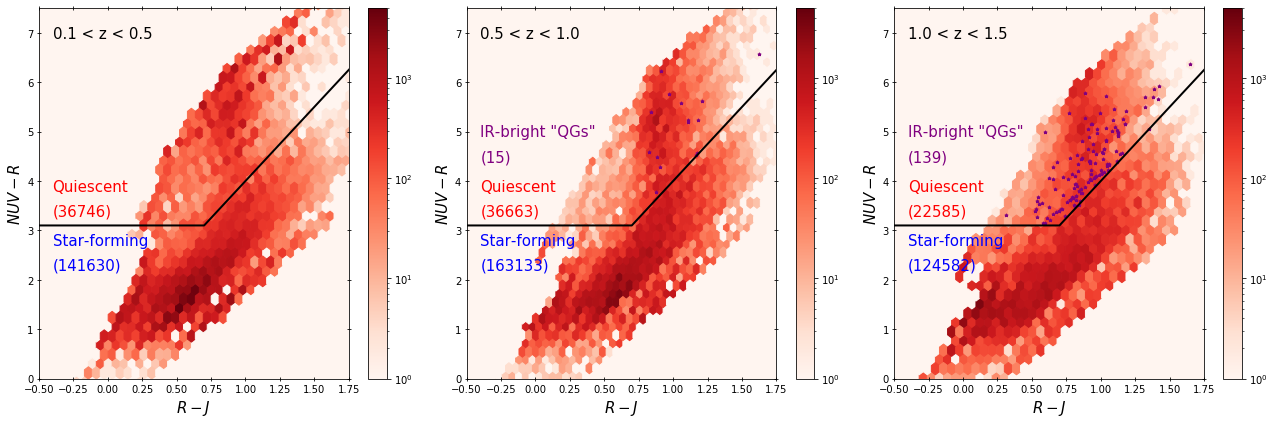

In [57]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, z1, z2 in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    data.plot.hexbin(x='RJ',y='NUVR',bins='log',ax=ax[i],gridsize=50,vmax=5000,cmap='Reds')
    ax[i].scatter(data.loc[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&(data['SFR_24']>100),'RJ'],
                  data.loc[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&(data['SFR_24']>100),'NUVR'],
                  color='purple',marker='*',s=10)
    ax[i].plot([-1,0.7,3],[3.1,3.1,10],color='k',linewidth=2,label='Color selection boundary')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&((data['SFR_24']<=100)|(~np.isfinite(data['SFR_24'])))])
    irbqg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&(data['SFR_24']>100)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])    
    ax[i].set_xlabel('$R - J$',size=15)
    ax[i].set_ylabel('$NUV - R$',size=15)
    ax[i].text(-0.4,6.9,f'{z1} < z < {z2}',size=15,color='k')
    if irbqg!=0:
        ax[i].text(-0.4,4.9,f'IR-bright "QGs"',size=15,color='purple')
        ax[i].text(-0.4,4.4,f'({irbqg})',size=15,color='purple')
    ax[i].text(-0.4,3.8,f'Quiescent',size=15,color='r')
    ax[i].text(-0.4,3.3,f'({qg})',size=15,color='r')
    ax[i].text(-0.4,2.7,f'Star-forming',size=15,color='b')
    ax[i].text(-0.4,2.2,f'({sfg})',size=15,color='b')
    ax[i].set_xlim(-0.5,1.75)
    ax[i].set_ylim(0,7.5)
    ax[i].tick_params(which='both',top=True,right=True,direction='inout')
fig.tight_layout()
plt.show()

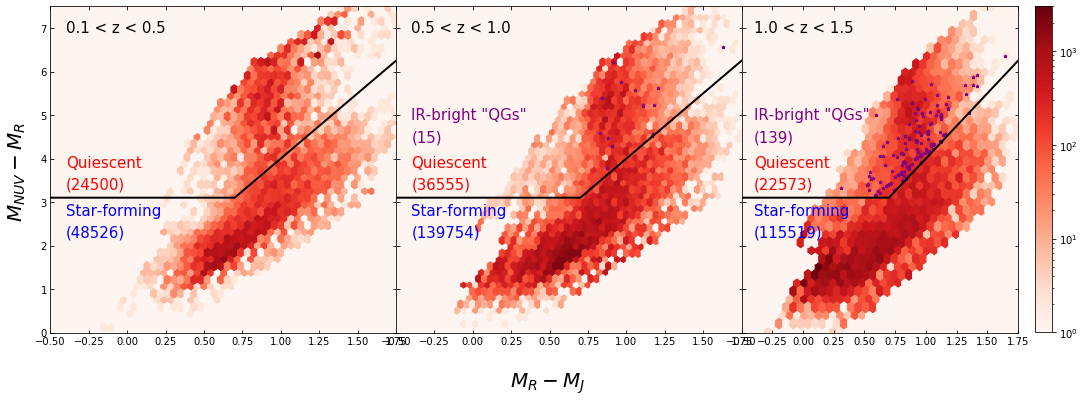

In [31]:
fig, ax = plt.subplots(1,3,figsize=(15,6),sharey='row')
for i, z1, z2 in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    data = bootes_1[(bootes_1['z']>z1)&(bootes_1['z']<=z2)]
    #data.plot.hexbin(x='RJ',y='NUVR',bins='log',ax=ax[i],gridsize=50,vmax=3000,cmap='Reds')
    hb = ax[i].hexbin(data.loc[:,'RJ'],data.loc[:,'NUVR'],cmap='Reds',bins='log',vmax=3000,gridsize=50)
    ax[i].scatter(data.loc[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&(data['SFR_24']>100),'RJ'],
                  data.loc[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&(data['SFR_24']>100),'NUVR'],
                  color='purple',marker='*',s=10)
    ax[i].plot([-1,0.7,3],[3.1,3.1,10],color='k',linewidth=2,label='Color selection boundary')
    qg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&((data['SFR_24']<=100)|(~np.isfinite(data['SFR_24'])))])
    irbqg=len(data[(data['NUVR']>3.1)&(data['NUVR']>3*data['RJ']+1)&(data['SFR_24']>100)])
    sfg=len(data[(data['NUVR']<=3.1)|(data['NUVR']<=3*data['RJ']+1)])
    ax[i].text(-0.4,6.9,f'{z1} < z < {z2}',size=15,color='k')
    if irbqg!=0:
        ax[i].text(-0.4,4.9,f'IR-bright "QGs"',size=15,color='purple')
        ax[i].text(-0.4,4.4,f'({irbqg})',size=15,color='purple')
    ax[i].text(-0.4,3.8,f'Quiescent',size=15,color='r')
    ax[i].text(-0.4,3.3,f'({qg})',size=15,color='r')
    ax[i].text(-0.4,2.7,f'Star-forming',size=15,color='b')
    ax[i].text(-0.4,2.2,f'({sfg})',size=15,color='b')
    ax[i].set_xlim(-0.5,1.75)
    ax[i].set_ylim(0,7.5)
    ax[i].imshow(np.zeros((50,50)),extent=[-25,25,-25,25],cmap='Reds',aspect='auto')
    ax[i].tick_params(which='both',top=True,right=True,direction='in')
cb = fig.colorbar(hb)
fig.text(0.5, 0.0,'$M_{R} - M_{J}$', ha='center',fontsize=20)
fig.text(0.0, 0.5,'$M_{NUV} - M_{R}$', va='center',fontsize=20, rotation='vertical')
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

### This is to find the sources that are detected in both IR and radio:

In [35]:
bootes_1['IRRadio'] = bootes_1['Peak_flux']+bootes_1['F_PACS_100']

## Extracting fluxes from stacked image cutouts

In [30]:
### Packages for aperture photometry
from photutils import CircularAperture
from photutils import aperture_photometry
from astropy.stats import bootstrap

### Get fluxes from stacked cutouts and their uncertainties from bootstrap samples, and write them on a table

In [31]:
def get_flux_and_unc(group_name,image_data,W,pixscale,FWHM,unit):
    ''' Create cutouts of the sources listed in group_name, taken from the map in image_data using
        the world coordinate system W. Stack images to get the median value in each pixel. Extract
        the flux from stack performing aperture photometry with a radius equal to FWHM, converted 
        from arcsec into pixels with pixscale.
        Returns flux in mJy
    '''
    cutout_list=[]
    for ra,dec in zip(grouped_1.get_group(group_name).loc[:,'RA'],grouped_1.get_group(group_name).loc[:,'DEC']):
        world_coords = [ra,dec]
        pixel_coords = W.all_world2pix([world_coords], 0)
        position = (pixel_coords[0][0],pixel_coords[0][1])
        size = (FWHM*2/pixscale+2, FWHM*2/pixscale+2) # twice the fwhm plus 2 pixels
        cutout = Cutout2D(image_data, position, size,mode='partial') # no trimming of cutouts
        cutout_list.append(cutout.data)
    
    cutout_list = np.array(cutout_list)
    #print(cutout_list.shape)
    boot_arr = bootstrap(np.arange(len(cutout_list)),bootnum=100).astype(int)
    #print(boot_arr.shape)

    median_list=[]
    for n in boot_arr:
        stack = cutout_list[n]
        stack = np.median(stack,axis=0)
                                    # aperture center position in pixel coordinates
        aperture = CircularAperture((FWHM/pixscale+0.5,FWHM/pixscale+0.5),r=FWHM/pixscale)
        phot_table = aperture_photometry(stack, aperture)
        median_list.append(phot_table['aperture_sum'][0])    
        
    if unit=='Jy/pix':
        median_flux = np.mean(median_list)
        std_flux = np.std(median_list)        
    elif unit=='Jy/beam':
        pixarea = pixscale**2 # pixel area in arcsec^2/pixel
        beamarea = np.pi*((FWHM**2)/(4*np.log(2))) # beam area in arcsec^2/beam
        median_flux = np.mean(median_list)*pixarea/beamarea # converting to Jy/pixel
        std_flux = np.std(median_list)*pixarea/beamarea
    print(group_name)
    
    return median_flux*1000, std_flux*1000 # from Jy to mJy

In [33]:
# Create table with fluxes and their uncertainties
time_start = time()
results_table_1 = pd.DataFrame({})
for name in grouped_1.groups.keys():
    
    flux_lofar,std_lofar = get_flux_and_unc(name,imdata_lofar,w_lofar,pixscale_lofar,FWHM=6.0,unit='Jy/beam')    
    flux_100,std_100 = get_flux_and_unc(name,imdata_100,w_100,pixscale_100,FWHM=6.8,unit='Jy/pix')
    flux_160,std_160 = get_flux_and_unc(name,imdata_160,w_160,pixscale_160,FWHM=11.0,unit='Jy/pix')
    flux_250,std_250 = get_flux_and_unc(name,imdata_250,w_250,pixscale_250,FWHM=18.2,unit='Jy/beam')
    flux_350,std_350 = get_flux_and_unc(name,imdata_350,w_350,pixscale_350,FWHM=24.9,unit='Jy/beam')
    flux_500,std_500 = get_flux_and_unc(name,imdata_500,w_500,pixscale_500,FWHM=36.3,unit='Jy/beam')
        
    results_table_1 = results_table_1.append(pd.DataFrame({"Type":[name[0]],
                                                           "Mass_range":[f'{name[1]} - {name[1]+binwidth}'],
                                                           "Median_mass":[grouped_1.get_group(name).median()['Mass_median_2']],
                                                           "Redshift_range":[f'{name[2]} - {name[2]+0.5}'],
                                                           "Median_redshift":[grouped_1.get_group(name).median()['z']],
                                                           "Count":[len(grouped_1.get_group(name))],#}),ignore_index=True)
                                                           "LOFAR_flux(mJy)":[flux_lofar],
                                                           "LOFAR_std(mJy)":[std_lofar],
                                                           "100_flux(mJy)":[flux_100],
                                                           "100_std(mJy)":[std_100],
                                                           "160_flux(mJy)":[flux_160],
                                                           "160_std(mJy)":[std_100],
                                                           "250_flux(mJy)":[flux_250],
                                                           "250_std(mJy)":[std_100],
                                                           "350_flux(mJy)":[flux_350],
                                                           "350_std(mJy)":[std_100],
                                                           "500_flux(mJy)":[flux_500],
                                                           "500_std(mJy)":[std_100]}),ignore_index=True)
time_end = time()
print()
print(time_end-time_start)

('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.799

('QG', 11.25, 0.0)
('QG', 11.25, 0.0)
('QG', 11.25, 0.0)
('QG', 11.25, 0.0)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.5499999999

('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 1.0)
('SFG', 11.85, 1.0)
('SFG',

In [33]:
# Create table with fluxes and their uncertainties
time_start = time()
results_table = pd.DataFrame({})
for name in grouped_1.groups.keys():
    
    flux_lofar,std_lofar = get_flux_and_unc(name,imdata_lofar,w_lofar,pixscale_lofar,FWHM=6.0,unit='Jy/beam')    
    flux_100,std_100 = get_flux_and_unc(name,imdata_100,w_100,pixscale_100,FWHM=6.8,unit='Jy/pix')
    flux_160,std_160 = get_flux_and_unc(name,imdata_160,w_160,pixscale_160,FWHM=11.0,unit='Jy/pix')
    flux_250,std_250 = get_flux_and_unc(name,imdata_250,w_250,pixscale_250,FWHM=18.2,unit='Jy/beam')
    flux_350,std_350 = get_flux_and_unc(name,imdata_350,w_350,pixscale_350,FWHM=24.9,unit='Jy/beam')
    flux_500,std_500 = get_flux_and_unc(name,imdata_500,w_500,pixscale_500,FWHM=36.3,unit='Jy/beam')
        
    results_table = results_table.append(pd.DataFrame({"Type":[name[0]],
                                                       "Redshift_range":[f'{name[1]} - {name[1]+z_binwidth}'],
                                                       "Median_redshift":[grouped_1.get_group(name).median()['z']],
                                                       "Mass_range":[f'{name[2]} - {name[2]+mass_binwidth}'],
                                                       "Median_mass":[grouped_1.get_group(name).median()['Mass_median_2']],
                                                       "Count":[len(grouped_1.get_group(name))],#}),ignore_index=True)
                                                       "IR_detected":[grouped_1.get_group(name).count().loc['F_PACS_100']],
                                                       "Radio_detected":[grouped_1.get_group(name).count().loc['Peak_flux']],
                                                       "IRRadio_detected":[grouped_1.get_group(name).count().loc['IRRadio']],
                                                       "LOFAR_flux(mJy)":[flux_lofar],
                                                       "LOFAR_std(mJy)":[std_lofar],
                                                       "100_flux(mJy)":[flux_100],
                                                       "100_std(mJy)":[std_100],
                                                       "160_flux(mJy)":[flux_160],
                                                       "160_std(mJy)":[std_100],
                                                       "250_flux(mJy)":[flux_250],
                                                       "250_std(mJy)":[std_100],
                                                       "350_flux(mJy)":[flux_350],
                                                       "350_std(mJy)":[std_100],
                                                       "500_flux(mJy)":[flux_500],
                                                       "500_std(mJy)":[std_100]}),ignore_index=True)
time_end = time()
print()
print(time_end-time_start)

('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.049999999999999, 0.5)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.2, 1.0)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 0.5)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.35, 1.0)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 0.5)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.5, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.65, 1.0)
('IRBQG', 10.799

('QG', 11.25, 0.0)
('QG', 11.25, 0.0)
('QG', 11.25, 0.0)
('QG', 11.25, 0.0)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 0.5)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.25, 1.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.0)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 0.5)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.4, 1.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.0)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.549999999999999, 0.5)
('QG', 11.5499999999

('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.0)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 0.5)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.4, 1.0)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 0.5)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.549999999999999, 1.0)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.7, 0.5)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 0.0)
('SFG', 11.85, 1.0)
('SFG', 11.85, 1.0)
('SFG',

In [42]:
# Create table with fluxes and their uncertainties
time_start = time()
results_table_1 = pd.DataFrame({})
for name in grouped_1.groups.keys():
        
    results_table_1 = results_table_1.append(pd.DataFrame({"Type":[name[0]],
                                                           "Redshift_range":[f'{name[1]} - {name[1]+z_binwidth}'],
                                                           "Median_redshift":[grouped_1.get_group(name).median()['z']],
                                                           "Mass_range":[f'{name[2]} - {name[2]+mass_binwidth}'],
                                                           "Median_mass":[grouped_1.get_group(name).median()['Mass_median_2']],
                                                           "Count":[len(grouped_1.get_group(name))],
                                                           "IR_detected":[grouped_1.get_group(name).count().loc['F_PACS_100']],
                                                           "Radio_detected":[grouped_1.get_group(name).count().loc['Peak_flux']],
                                                           "IRRadio_detected":[grouped_1.get_group(name).count().loc['IRRadio']]}),ignore_index=True)
time_end = time()
print()
print(time_end-time_start)


5.145610332489014


In [43]:
results_table_1[results_table_1['Type']=='QG']

Type Redshift_range  Median_redshift                 Mass_range  \
18   QG      0.0 - 0.5          0.23230                 9.0 - 9.15   
19   QG      0.0 - 0.5          0.23610                 9.15 - 9.3   
20   QG      0.0 - 0.5          0.23790   9.299999999999999 - 9.45   
21   QG      0.0 - 0.5          0.25540                 9.45 - 9.6   
22   QG      0.0 - 0.5          0.27970                 9.6 - 9.75   
..  ...            ...              ...                        ...   
74   QG      1.0 - 1.5          1.19475               11.1 - 11.25   
75   QG      1.0 - 1.5          1.20440               11.25 - 11.4   
76   QG      1.0 - 1.5          1.23630               11.4 - 11.55   
77   QG      1.0 - 1.5          1.23620  11.549999999999999 - 11.7   
78   QG      1.0 - 1.5          1.38245               11.7 - 11.85   

    Median_mass  Count  IR_detected  Radio_detected  IRRadio_detected  
18     9.072879   2571          345               0                 0  
19     9.222055   2380          371               0                 0  
20     9.373632   1975          348               0                 0  
21     9.523834   1756          361               1                 1  
22     9.675289   1568          365               0                 0  
..          ...    ...          ...             ...               ...  
74    11.162594   2242         1108              92                59  
75    11.304626    913          441              50                27  
76    11.446465    278          126              35                19  
77    11.584814     33           15               3                 1  
78    11.768374      4            3               0                 0  

[61 rows x 9 columns]

## Saving table with stacking results
### BE EXTRA CAREFUL NOT TO OVERWRITE FILES IN THIS SECTION

In [58]:
#results_table_1.to_csv(path+'Bootes/Bootes_full_results_NDWFS_4.csv',index=False)

In [46]:
#results_table_1.to_csv(path+'Bootes/Bootes_full_detected_count.csv',index=False)

## Properties of selected sub-sample

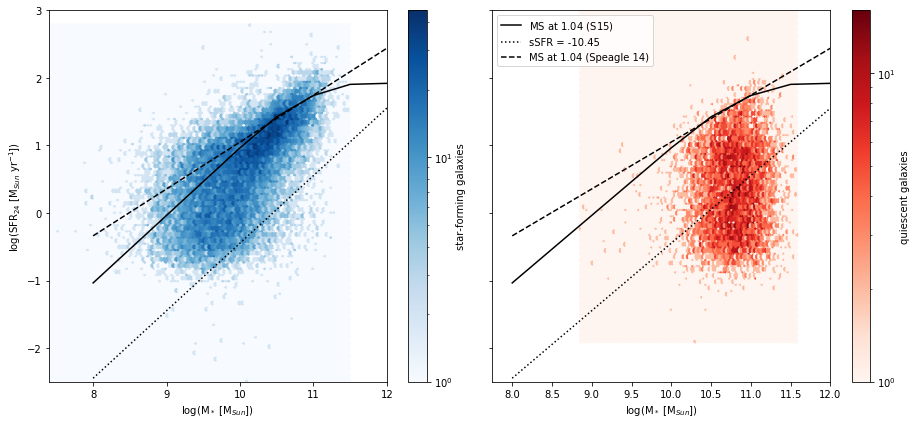

In [69]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.99<z<1.09)&'+SF).loc[:,'Mass_median_2'],
            np.log10(bootes.query('(0.99<z<1.09)&'+SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.99<z<1.09)&'+quiescent).loc[:,'Mass_median_2'],
            np.log10(bootes.query('(0.99<z<1.09)&'+quiescent).loc[:,'SFR_24']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z1}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=-2.5,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

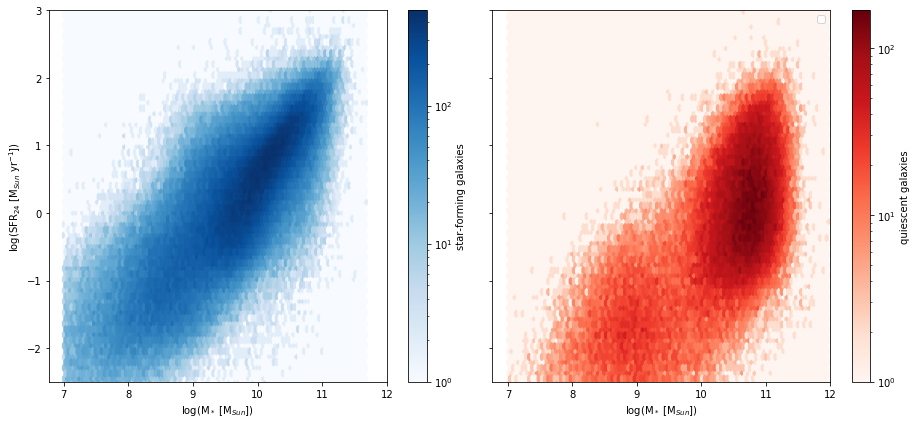

In [78]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query(SF).loc[:,'Mass_median_2'],
            np.log10(bootes.query(SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
#axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
#axs[0].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query(quiescent).loc[:,'Mass_median_2'],
            np.log10(bootes.query(quiescent).loc[:,'SFR_24']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
#axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z1}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
#axs[1].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=-2.5,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


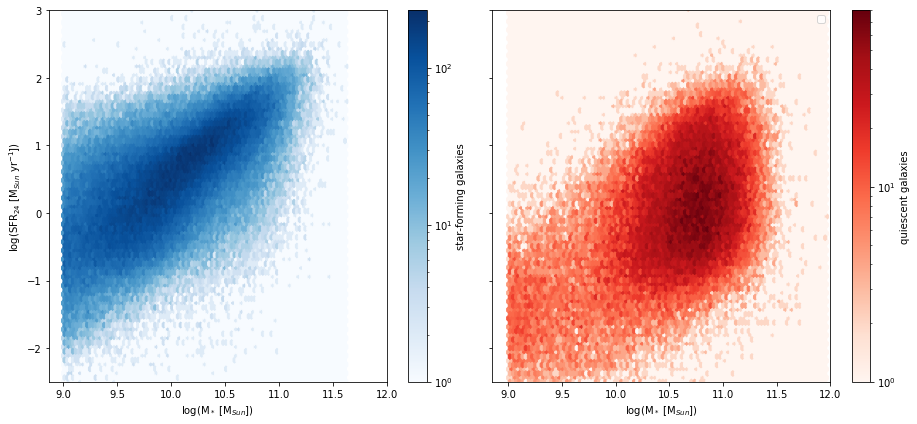

In [46]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes_1.query(SF).loc[:,'Mass_median_2'],
            np.log10(bootes_1.query(SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
#axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
#axs[0].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes_1.query(quiescent).loc[:,'Mass_median_2'],
            np.log10(bootes_1.query(quiescent).loc[:,'SFR_24']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
#axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z1}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
#axs[1].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=-2.5,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


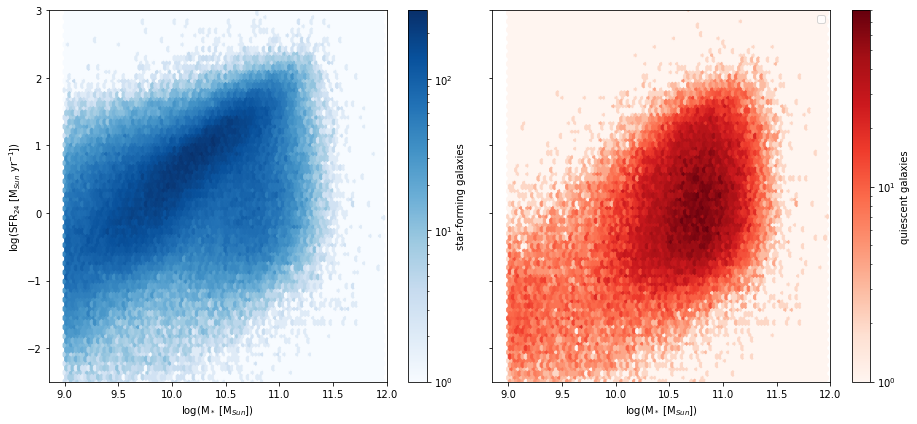

In [48]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes_1.loc[:,'Mass_median_2'],
            np.log10(bootes_1.loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
#axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
#axs[0].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes_1.query(quiescent).loc[:,'Mass_median_2'],
            np.log10(bootes_1.query(quiescent).loc[:,'SFR_24']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
#axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z1}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
#axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
#axs[1].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=-2.5,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

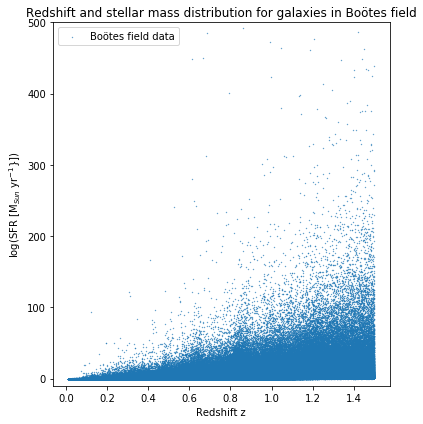

In [76]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
# Plotting stellar mass histogram
# Plotting Stellar mass vs Redshift
ax.set_title('Redshift and stellar mass distribution for galaxies in Boötes field')
ax.set_xlabel("Redshift z",fontsize=10)
ax.set_ylabel("log(SFR [M$_{Sun}$ yr$^{-1}$}])",fontsize=10)
ax.scatter(bootes['z'],bootes['SFR_24'],s=0.1,label='Boötes field data')
ax.legend(numpoints=1, loc='best')
ax.set_ylim(ymin=-10,ymax=500)
fig.tight_layout()
plt.show()

In [80]:
bootes[bootes['SFR_24']>100]

RA        DEC    Ks_flux  F_MIPS_24  FErr_MIPS_24_u  \
248     216.786062  32.327552  13.471462  189.03467       211.04193   
499     217.262728  32.331164  12.412303  174.03638       200.58380   
6888    217.401287  32.369671  11.058192  161.87875       178.66922   
7470    217.551548  32.373212  17.767191  263.35376       278.99060   
8378    216.681738  32.378442  10.034987  255.38377       272.39087   
...            ...        ...        ...        ...             ...   
828882  219.281673  35.777441  42.257875  772.11370       786.33307   
829809  217.533798  35.782668  63.942446  873.85380       889.72180   
830688  217.941659  35.787162  32.747493  291.19968       304.19376   
831395  217.731891  35.791014  50.941387  521.03094       535.50840   
831616  217.708386  35.792357  12.668688  295.71213       313.65250   

        FErr_MIPS_24_l  F_PACS_100  F_PACS_160  F_SPIRE_250  F_SPIRE_350  ...  \
248          168.67499         NaN         NaN     2.282373     2.535618  ...   
499          137.01266         NaN         NaN     6.666145    12.443625  ...   
6888         144.62518         NaN         NaN     6.195583    17.948433  ...   
7470         247.46645         NaN         NaN     2.912300    23.633036  ...   
8378         237.75363         NaN         NaN     3.166033     2.594383  ...   
...                ...         ...         ...          ...          ...  ...   
828882       758.07690    6.680764   41.847840    24.187850     7.891940  ...   
829809       858.02650   19.281390   19.928663     0.235537     0.287955  ...   
830688       278.00200   24.521389   44.381800    30.723673    33.203880  ...   
831395       507.19254    5.571233   25.506530     5.769590     5.262581  ...   
831616       276.15260   30.655325   43.632828     0.686458     0.646789  ...   

        Z_BEST       z  Mass_median_2   R_rest_2   J_rest_2   NUV_rest  \
248     1.4741  1.4741      10.962000 -23.594545 -24.116667 -20.819471   
499     1.4444  1.4444      10.942149 -23.137537 -24.093912 -20.027113   
6888    1.4694  1.4694      10.911322 -22.797998 -23.743933 -20.004183   
7470    1.2399  1.2399      10.711634 -22.748213 -23.520830 -20.195757   
8378    1.3095  1.3095      10.554069 -22.006205 -22.739443 -20.021810   
...        ...     ...            ...        ...        ...        ...   
828882  0.9691  0.9691      11.020022 -22.408045 -23.721980 -18.002245   
829809  0.9614  0.9614      11.089698 -22.779352 -24.030580 -18.835390   
830688  1.4395  1.4395      10.952271 -23.390654 -24.656404 -20.215532   
831395  1.0454  1.0454      10.518348 -22.727182 -23.998598 -19.675325   
831616  1.2022  1.2022      10.692930 -22.938692 -23.411554 -19.554811   

            NUVR        RJ        LIR_24      SFR_24  
248     2.775074  0.522122  1.271172e+12  126.496543  
499     3.110424  0.956375  1.130676e+12  112.274287  
6888    2.793815  0.945935  1.056813e+12  104.809865  
7470    2.552456  0.772617  1.061612e+12  105.294589  
8378    1.984395  0.733238  1.322090e+12  131.945820  
...          ...       ...           ...         ...  
828882  4.405800  1.313935  1.248830e+12  124.232868  
829809  3.943962  1.251228  1.400999e+12  140.366935  
830688  3.175122  1.265750  2.064148e+12  212.265435  
831395  3.051857  1.271416  1.045775e+12  103.695281  
831616  3.383881  0.472862  1.042172e+12  103.331452  

[2201 rows x 21 columns]

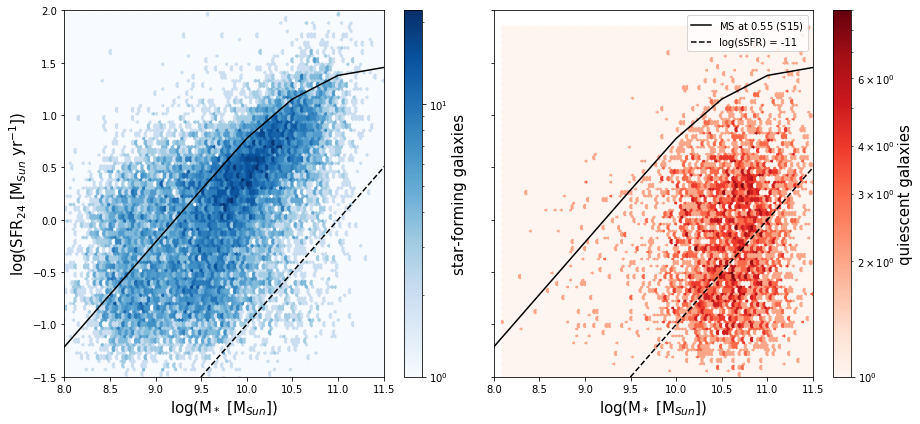

In [29]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',sharex='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=15)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
hb = axs[0].hexbin(bootes.query('(8<Mass_median<11.5)&(-1.5<SFR_24<100)&(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(8<Mass_median<11.5)&(-1.5<SFR_24<100)&(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies',fontsize=15)
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=15)
hb = axs[1].hexbin(bootes.query('(8<Mass_median<11.5)&(-1.5<SFR_24<100)&(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(8<Mass_median<11.5)&(-1.5<SFR_24<100)&(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies',fontsize=15)
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmin=8,xmax=11.5)
axs[1].set_ylim(ymin=-1.5,ymax=2)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Here we overlay the individual quiescent galaxies on top of the color map showing th star-forming galaxies. We can observe that the star-forming population roughly follows the trend of the SF Main Sequence, while the quiescent population falls almost exclusively below the MS.

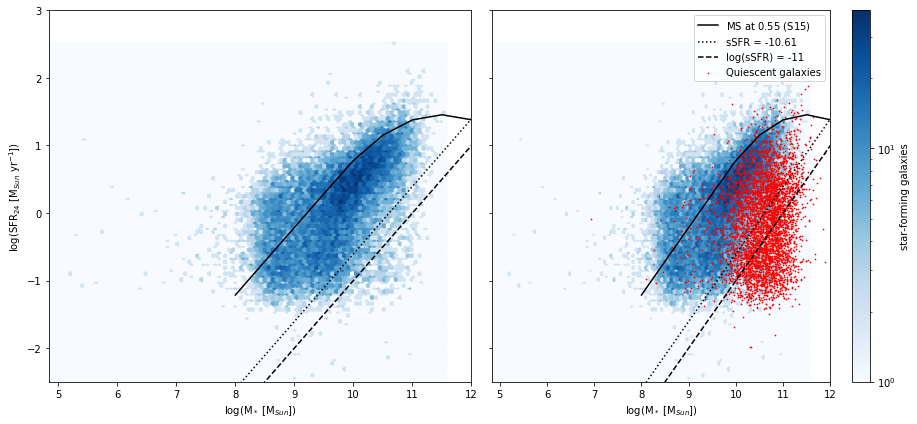

In [30]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('star-forming galaxies')
axs[1].scatter(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']),
            s=0.5,color='r',label='Quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=-2.5,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

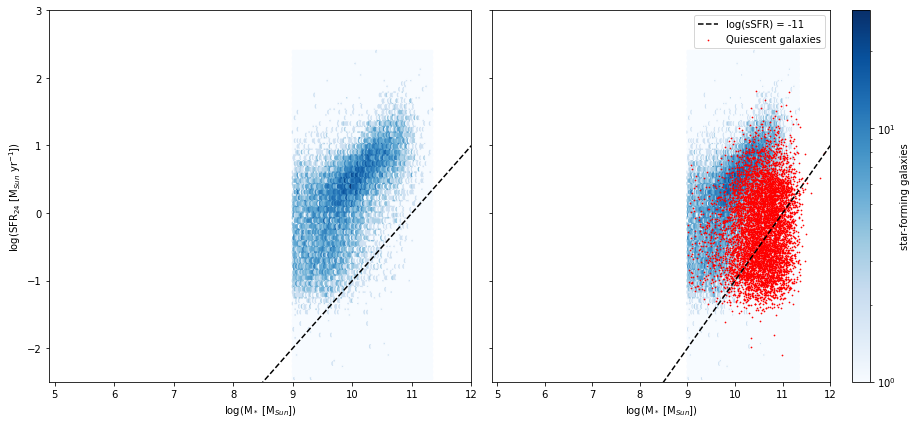

In [52]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes_1.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median_2'],
            np.log10(bootes_1.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
#axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmin=4.9,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes_1.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median_2'],
            np.log10(bootes_1.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('star-forming galaxies')
axs[1].scatter(bootes_1.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median_2'],
            np.log10(bootes_1.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']),
            s=0.5,color='r',label='Quiescent galaxies')
#axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmin=4.9,xmax=12)
axs[1].set_ylim(ymin=-2.5,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

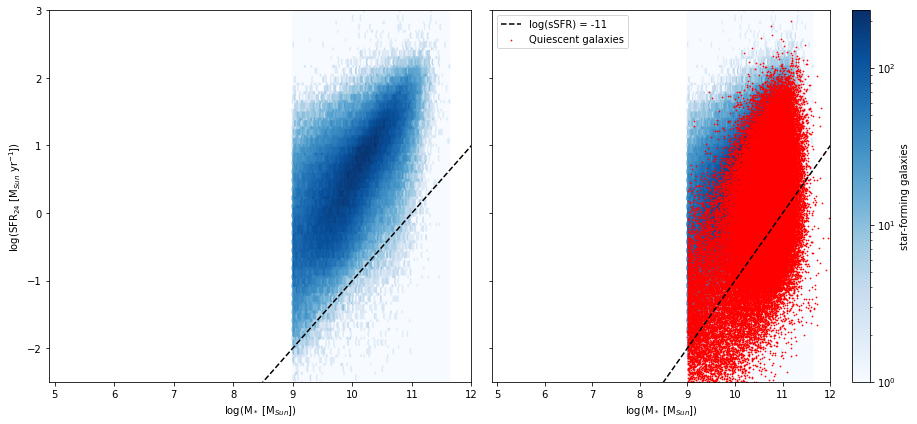

In [53]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes_1.query(SF).loc[:,'Mass_median_2'],
            np.log10(bootes_1.query(SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
#axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmin=4.9,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes_1.query(SF).loc[:,'Mass_median_2'],
            np.log10(bootes_1.query(SF).loc[:,'SFR_24']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('star-forming galaxies')
axs[1].scatter(bootes_1.query(quiescent).loc[:,'Mass_median_2'],
            np.log10(bootes_1.query(quiescent).loc[:,'SFR_24']),
            s=0.5,color='r',label='Quiescent galaxies')
#axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmin=4.9,xmax=12)
axs[1].set_ylim(ymin=-2.5,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Following the inverse procedure, we can show in the color-color diagram the distribution of galaxies that are classified as quiescent or star-forming according to the limit defined by Carnall 2020, which implies an maximum sSFR of -10.61 at redshift ~0.55. We can see that the great majority of low sSFR galaxies are indeed foun within the quiescent region of the color-color diagram, but also many Main Sequence galaxies are being misclassified as quiescent.

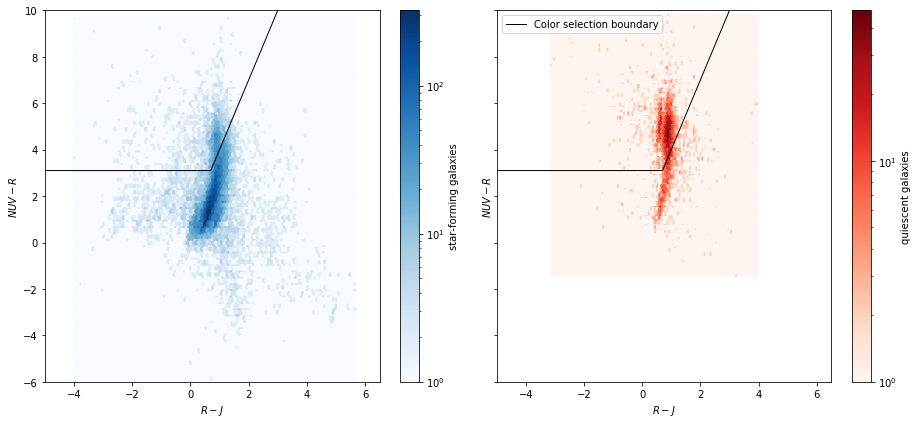

In [46]:
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
axs[0].set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']>age_factor,'RJ'],
                bootes.query('(0.5<Z_BEST<0.6)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']>age_factor,'NUVR'],
                bins='log',cmap='Blues')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs[0].set_xlim(xmin=-5,xmax=6.5)
axs[0].set_ylim(ymin=-6,ymax=10)

axs[1].set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
axs[1].set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']<=age_factor,'RJ'],
                bootes.query('(0.5<Z_BEST<0.6)').loc[np.log10(bootes['SFR_24'])-bootes['Mass_median']<=age_factor,'NUVR'],
                bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs[1].set_xlim(xmin=-5,xmax=6.5)

axs[1].legend(numpoints=1, loc='best')
#axs[1].text(-4.9,3.5,f"Quiescent ({n_quiescent/final_sample:.2%})",size=12,color='r')
#axs[1].text(-4.9,2.5,f"Star-forming ({n_star_forming/final_sample:.2%})",size=12,color='b')
fig.tight_layout()
plt.show()

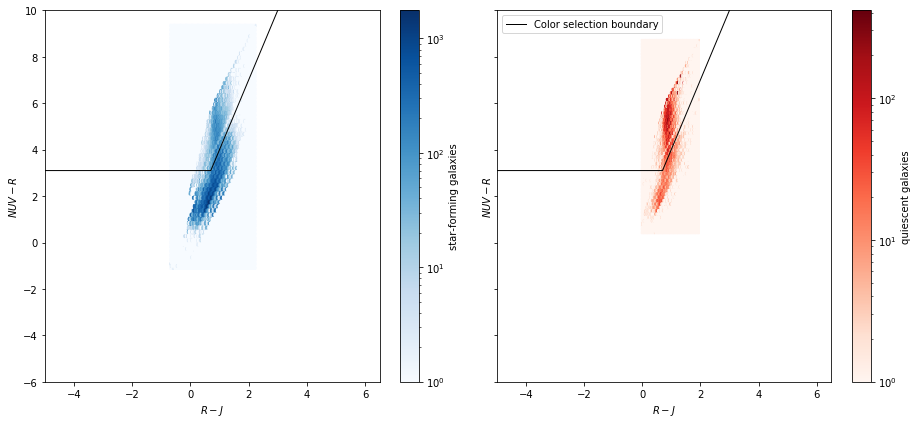

In [56]:
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
axs[0].set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
hb = axs[0].hexbin(bootes_1.loc[np.log10(bootes_1['SFR_24'])-bootes_1['Mass_median_2']>-10.61,'RJ'],
                bootes_1.loc[np.log10(bootes_1['SFR_24'])-bootes_1['Mass_median_2']>-10.61,'NUVR'],
                bins='log',cmap='Blues')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs[0].set_xlim(xmin=-5,xmax=6.5)
axs[0].set_ylim(ymin=-6,ymax=10)

axs[1].set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
axs[1].set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
hb = axs[1].hexbin(bootes_1.loc[np.log10(bootes_1['SFR_24'])-bootes_1['Mass_median_2']<=-10.61,'RJ'],
                bootes_1.loc[np.log10(bootes_1['SFR_24'])-bootes_1['Mass_median_2']<=-10.61,'NUVR'],
                bins='log',cmap='Reds')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
axs[1].set_xlim(xmin=-5,xmax=6.5)

axs[1].legend(numpoints=1, loc='best')
#axs[1].text(-4.9,3.5,f"Quiescent ({n_quiescent/final_sample:.2%})",size=12,color='r')
#axs[1].text(-4.9,2.5,f"Star-forming ({n_star_forming/final_sample:.2%})",size=12,color='b')
fig.tight_layout()
plt.show()

## Estimating LIRs and SFRs from Herschel data
We can now check the number of entries wich have available data in the 2 PACS and 3 SPIRE bands from the Herschel space telescope.

In [30]:
q_PACS = len(bootes.query(quiescent).loc[np.isfinite(bootes['F_PACS_100']),:])
print(f"Fraction of quiescent galaxies with PACS data: {q_PACS/n_quiescent:.2%}")
sf_PACS = len(bootes.query(SF).loc[np.isfinite(bootes['F_PACS_100']),:])
print(f"Fraction of star forming galaxies with PACS data: {sf_PACS/n_star_forming:.2%}")
print("")
q_SPIRE = len(bootes.query(quiescent).loc[np.isfinite(bootes['F_SPIRE_500']),:])
print(f"Fraction of quiescent galaxies with SPIRE data: {q_SPIRE/n_quiescent:.2%}")
sf_SPIRE = len(bootes.query(SF).loc[np.isfinite(bootes['F_SPIRE_500']),:])
print(f"Fraction of star forming galaxies with SPIRE data: {sf_SPIRE/n_star_forming:.2%}")

Fraction of quiescent galaxies with PACS data: 41.20%
Fraction of star forming galaxies with PACS data: 39.52%

Fraction of quiescent galaxies with SPIRE data: 42.62%
Fraction of star forming galaxies with SPIRE data: 41.14%


We will now estimate the total infrared luminosities by redshifting and rescaling a modified greybody model to the available Herschel PACS + SPIRE data. The greybody + power law model is taken from Casey (2012).

In [31]:
from scipy.optimize import curve_fit
from scipy.integrate import quad
import astropy.units as u

In [32]:
def GreybodyPL(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for full IR regime
    given by an optically thick grey-body modelmodified with a MIR power-law
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    alpha = 2.0
    beta = 1.5
    Lc = (26.68 + alpha*6.246)**-2 + (1.905*(10**-4) + alpha*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

In [33]:
def HerschelLIR(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    if (~np.isfinite(dlist)).any():
        return np.nan
    else:            
        x_data = np.array([100,160,250,350,500])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])
        except RuntimeError:
            return np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
    
        return np.log10(LIR_LSun)

In [34]:
V_Herschel = np.vectorize(HerschelLIR)

In [35]:
bootes['LIR_H'] = V_Herschel(bootes['Z_BEST'],bootes['F_PACS_100'],bootes['F_PACS_160'],bootes['F_SPIRE_250'],bootes['F_SPIRE_350'],bootes['F_SPIRE_500'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Now we can use LIR for each galaxy to calculate the SFR according to the Schmidt-Kennicutt law, adjusted to the Chabrier (2003) initial mass function.

In [36]:
bootes['SFR_H'] = np.power(10,bootes['LIR_H'])/(1.7*5.8*10**9) # Kennicutt 1998 + Man 2016

Once again we can look at the distribution of the estimated SFR vs stellar mass for our star-forming and quiescent populations.

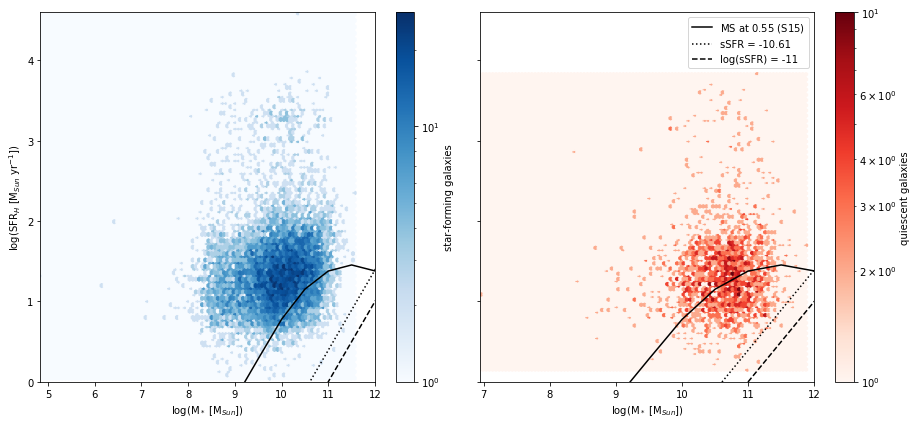

In [37]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=0,ymax=4.6)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

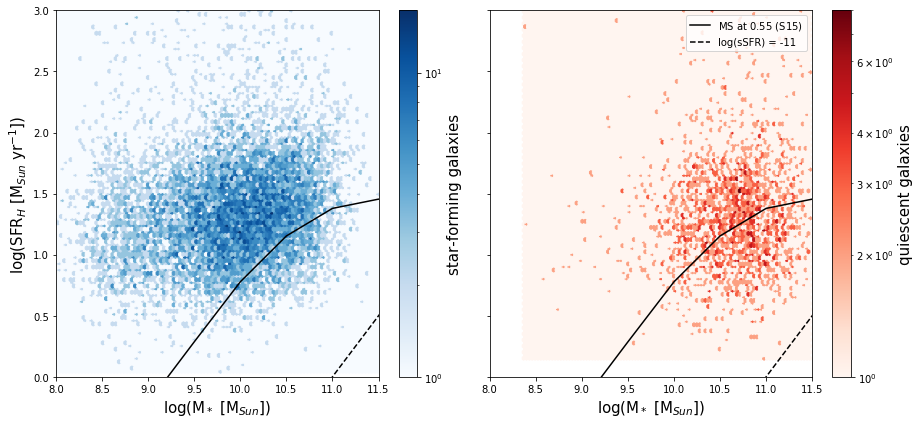

In [52]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',sharex='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=15)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H<1000)&(8<Mass_median<11.5)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H<1000)&(8<Mass_median<11.5)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies',fontsize=15)
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=11.5)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=15)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H<1000)&(8<Mass_median<11.5)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H<1000)&(8<Mass_median<11.5)&'+quiescent).loc[:,'SFR_H']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies',fontsize=15)
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmin=8,xmax=11.5)
axs[1].set_ylim(ymin=0,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

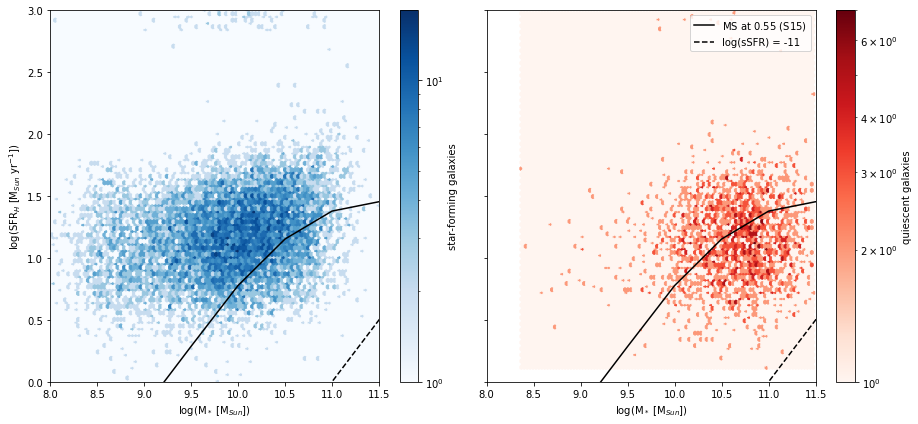

In [51]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',sharex='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H_40<1000)&(8<Mass_median<11.5)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H_40<1000)&(8<Mass_median<11.5)&'+SF).loc[:,'SFR_H_40']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=11.5)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H_40<1000)&(8<Mass_median<11.5)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&(SFR_H_40<1000)&(8<Mass_median<11.5)&'+quiescent).loc[:,'SFR_H_40']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
#axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmin=8,xmax=11.5)
axs[1].set_ylim(ymin=0,ymax=3)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

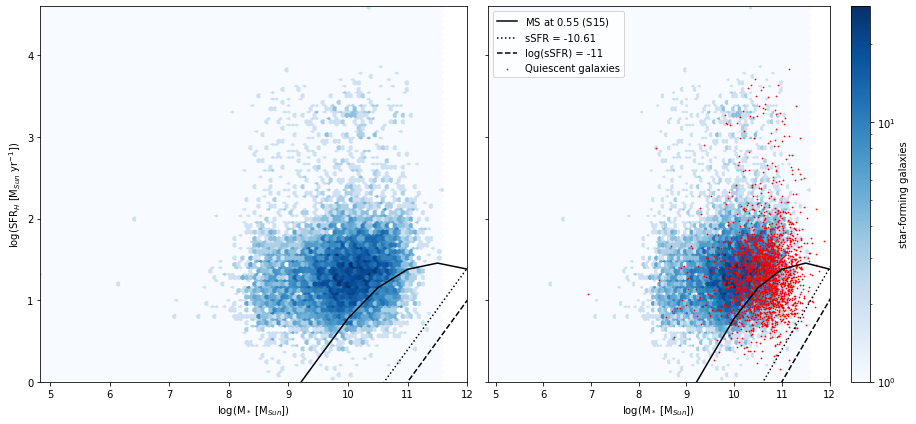

In [56]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('star-forming galaxies')
axs[1].scatter(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']),
            s=0.5,color='r',label='Quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=0,ymax=4.6)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

We can even compare our two estimates for SFRs, and see that thosw calculated from Herschel data are systematically higher than those from Spitzer MIPS data. 

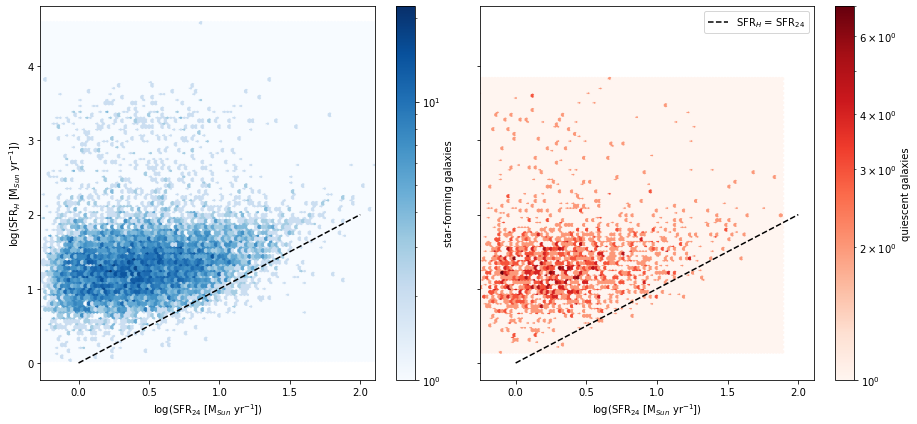

In [57]:
#%% Plotting Star formation rate calculated from Herschel and Spitzer data
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([0,2],[0,2],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')

axs[1].set_xlabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[1].hexbin(np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']),
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([0,2],[0,2],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[1].set_ylim(ymin=0,ymax=4.6)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Here we show the distribution of galaxies by SFR_24/SFR_H ratio vs Stellar mass

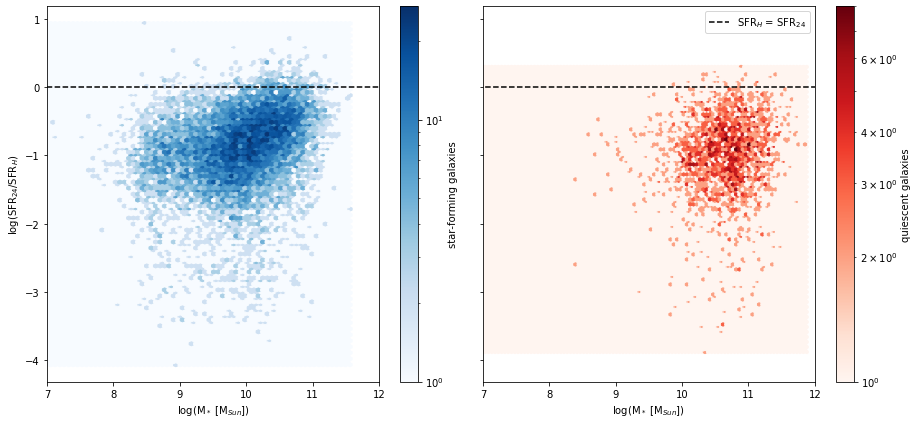

In [58]:
#%% Plotting SFR_24/SFR_H ratio vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$/SFR$_{H}$)",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([5,12],[0,0],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
axs[0].set_xlim(xmin=7,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']/bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([5,12],[0,0],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
axs[1].set_xlim(xmin=7,xmax=12)
#axs[1].set_yscale('log')
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Casey 2012 actually recommends using the IR emission in the interval of 40-1000 micron for calculations of SFR, as opposed to the traditional 8-1000 micron range. We can repeat the previous process modifying only the lower limit of integration.

In [46]:
def HerschelLIR40(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    if (~np.isfinite(dlist)).any():
        return np.nan
    else:            
        x_data = np.array([100,160,250,350,500])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])
        except RuntimeError:
            return np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),40,1000) # c/lambda^2 factor gives flux per unit of wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
    
        return np.log10(LIR_LSun)

In [47]:
V_Herschel40 = np.vectorize(HerschelLIR40)

In [48]:
bootes['LIR_H_40'] = V_Herschel40(bootes['Z_BEST'],bootes['F_PACS_100'],bootes['F_PACS_160'],bootes['F_SPIRE_250'],bootes['F_SPIRE_350'],bootes['F_SPIRE_500'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [49]:
bootes['SFR_H_40'] = np.power(10,bootes['LIR_H_40'])/(1.7*5.8*10**9) # Kennicutt 1998 + Man 2016

Here we show the distribution of galaxies in SFR vs Stellar mass for both our calculations of SFR.

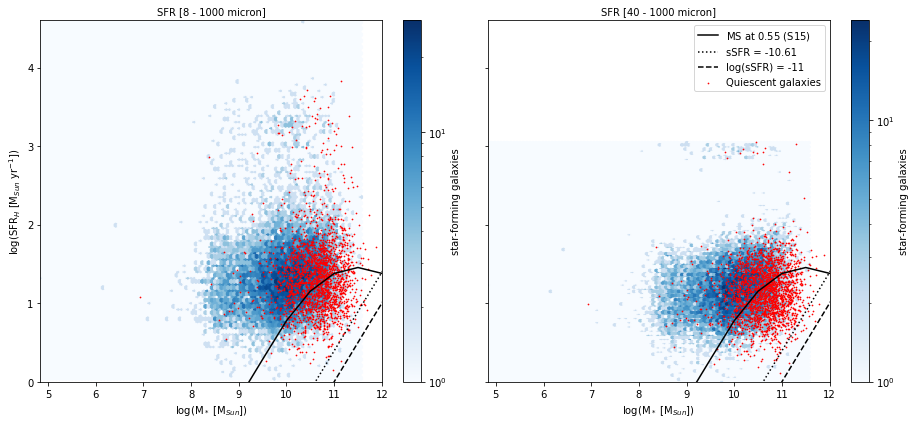

In [50]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_title("SFR [8 - 1000 micron]",fontsize=10)
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].scatter(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']),
            s=0.5,color='r',label='Quiescent galaxies')
axs[0].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[0].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[0].set_xlim(xmax=12)

axs[1].set_title("SFR [40 - 1000 micron]",fontsize=10)
axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H_40']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('star-forming galaxies')
axs[1].scatter(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H_40']),
            s=0.5,color='r',label='Quiescent galaxies')
axs[1].plot( m+9, logSFR, ls='-', c='k', label=f'MS at ${z}$ (S15)')
axs[1].plot([8,13],[8+age_factor,13+age_factor],':',color='k',label=f'sSFR = {age_factor:.4g}')
axs[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
axs[1].set_xlim(xmax=12)
axs[1].set_ylim(ymin=0,ymax=4.6)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

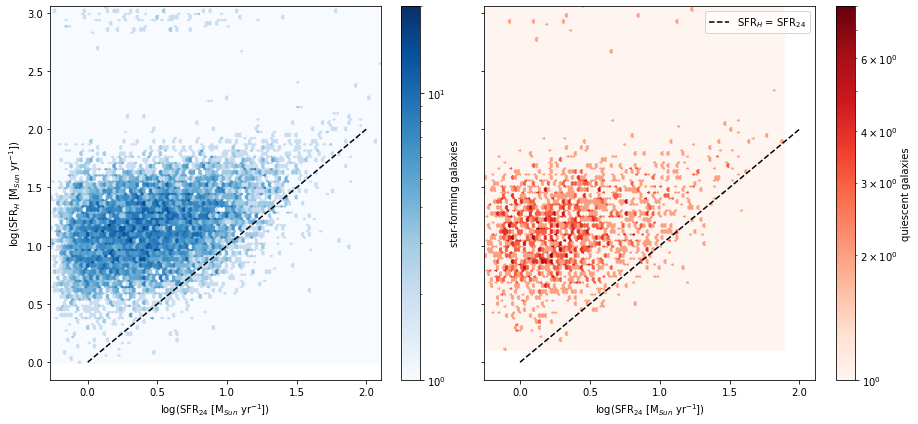

In [66]:
#%% Plotting Star formation rate calculated from Herschel and Spitzer data
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[0].hexbin(np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']),
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H_40']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([0,2],[0,2],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')

axs[1].set_xlabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = axs[1].hexbin(np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']),
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H_40']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([0,2],[0,2],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[1].set_ylim(ymin=0,ymax=4.6)
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

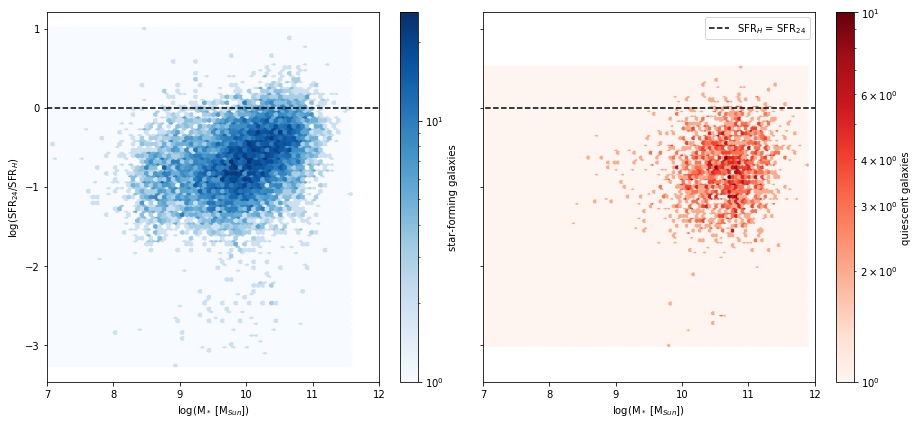

In [67]:
#%% Plotting SFR_24/SFR_H ratio vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{24}$/SFR$_{H}$)",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_24']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H_40']),
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([5,12],[0,0],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
axs[0].set_xlim(xmin=7,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            np.log10(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_24']/bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H_40']),
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
axs[1].plot([5,12],[0,0],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
axs[1].set_xlim(xmin=7,xmax=12)
#axs[1].set_ylim(ymin=0,ymax=4.6)
#axs[1].set_yscale('log')
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


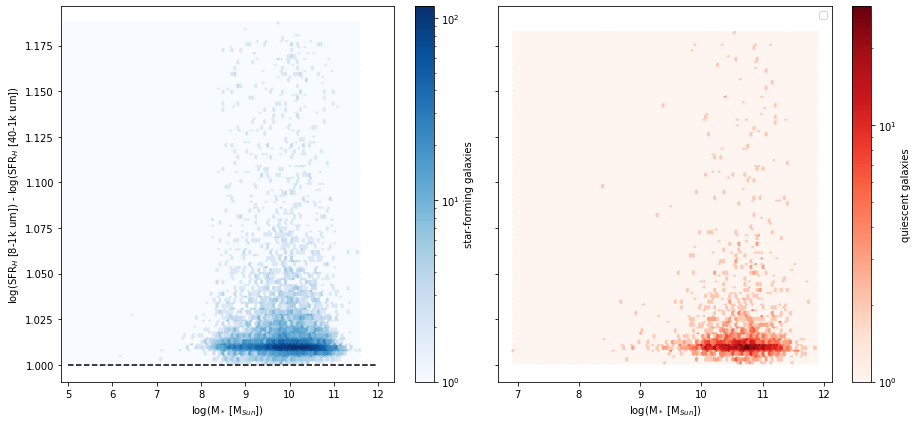

In [109]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [8-1k um]) - log(SFR$_{H}$ [40-1k um])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'LIR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'LIR_H_40'],
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[0].set_xlim(xmin=7,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'LIR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'LIR_H_40'],
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
#axs[1].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[1].set_xlim(xmin=7,xmax=12)
#axs[1].set_ylim(ymin=0,ymax=4.6)
#axs[1].set_yscale('log')
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


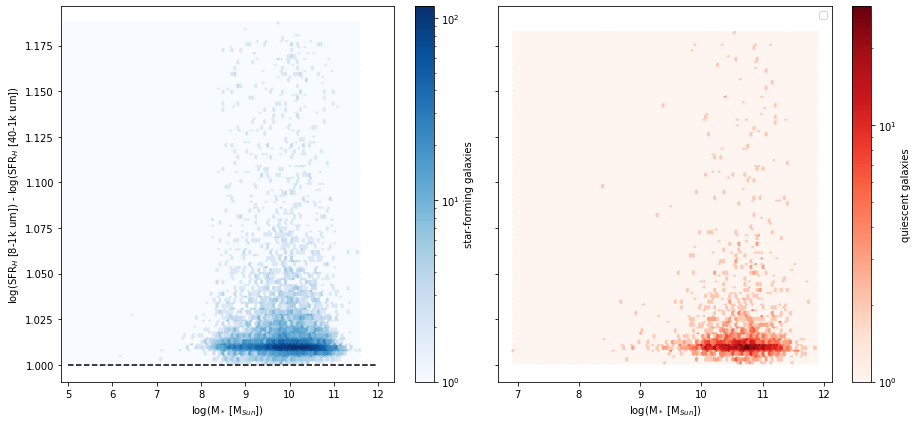

In [68]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("log(SFR$_{H}$ [8-1k um]) - log(SFR$_{H}$ [40-1k um])",fontsize=10)
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'LIR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'LIR_H_40'],
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
axs[0].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[0].set_xlim(xmin=7,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'LIR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'LIR_H_40'],
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
#axs[1].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ = SFR$_{24}$')
#axs[1].set_xlim(xmin=7,xmax=12)
#axs[1].set_ylim(ymin=0,ymax=4.6)
#axs[1].set_yscale('log')
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


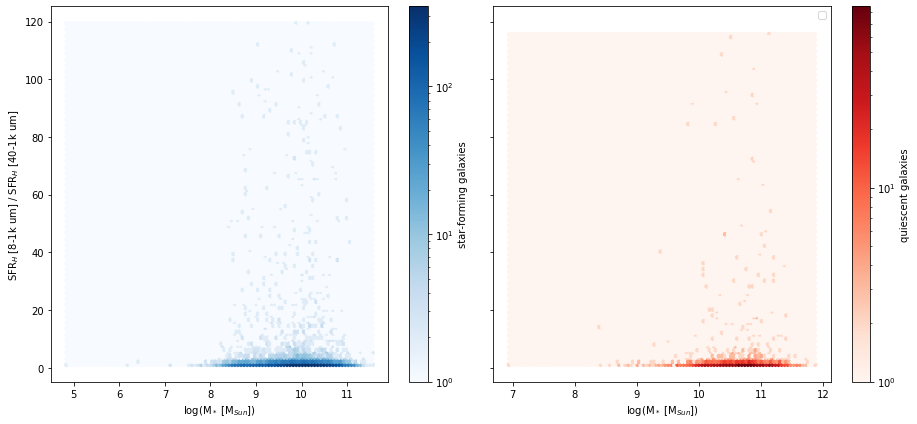

In [108]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,2,sharey='row',figsize=(13,6))
axs[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
axs[0].set_ylabel("SFR$_{H}$ [8-1k um] / SFR$_{H}$ [40-1k um]",fontsize=10)
#hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[bootes['SFR_H']/bootes['SFR_H_40']<5,'Mass_median'],
#            bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[bootes['SFR_H']/bootes['SFR_H_40']<5,'SFR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[bootes['SFR_H']/bootes['SFR_H_40']<5,'SFR_H_40'],
#            cmap='Blues',bins='log')
hb = axs[0].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+SF).loc[:,'SFR_H_40'],
            cmap='Blues',bins='log')
cb = fig.colorbar(hb, ax=axs[0])
cb.set_label('star-forming galaxies')
#axs[0].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ [8-1k um] = SFR$_{H}$ [40-1k um]')
#axs[0].set_xlim(xmin=7,xmax=12)

axs[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = axs[1].hexbin(bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'Mass_median'],
            bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H']/bootes.query('(0.5<Z_BEST<0.6)&'+quiescent).loc[:,'SFR_H_40'],
            cmap='Reds',bins='log')
cb = fig.colorbar(hb, ax=axs[1])
cb.set_label('quiescent galaxies')
#axs[1].plot([5,12],[1,1],'--',color='k',label='SFR$_{H}$ [8-1k um] = SFR$_{H}$ [40-1k um]' )
#axs[1].set_xlim(xmin=7,xmax=12)
#axs[1].set_ylim(ymin=1,ymax=5)
#axs[1].set_yscale('log')
axs[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

In [64]:
bootes.query('F_PACS_100>0')

RA        DEC    u_flux     Ks_flux   F_MIPS_24  \
45644    216.665040  32.460879  1.098642    8.590043   66.903244   
47125    216.394837  32.465252  0.077598   31.294355   67.464360   
47143    216.651973  32.465296  1.086764   36.811830  201.892720   
47990    216.450691  32.467813  0.265779    3.665034   51.935660   
49844    216.396077  32.473205  1.565705   13.784001   42.368004   
...             ...        ...       ...         ...         ...   
1494711  216.985367  35.675249  1.606410   10.495328   48.104473   
1494846  219.032425  35.675481  0.555871   49.875383   67.705284   
1494988  217.274819  35.675772  0.176187   55.321369  173.961470   
1495120  218.986744  35.676030  3.200013    4.122233   36.543552   
1495823  217.912245  35.677445  0.736605  130.850943  388.763200   

         FErr_MIPS_24_u  FErr_MIPS_24_l  F_PACS_100  F_PACS_160  F_SPIRE_250  \
45644         80.049900       52.360960  503.126220  493.384670     2.848694   
47125         84.428764       51.438934  600.806100  512.582640     1.165862   
47143        216.738820      187.076050  506.618700  490.689940     4.392479   
47990         75.657166       30.783833  516.819100  485.190220     0.628004   
49844         58.924854       25.264175   26.522411    9.528784     0.740417   
...                 ...             ...         ...         ...          ...   
1494711       64.754940       32.463108   11.471306    6.223834     1.437251   
1494846       82.354416       53.101303   36.188370   33.118100     2.146950   
1494988      192.358350      155.733340   11.971466   10.616992     2.984261   
1495120       57.954723       16.479734   46.875770    7.568207     2.936690   
1495823      401.511960      375.868680   41.144672   15.792737    24.500631   

         ...     J_rest   NUV_rest      NUVR        RJ        LIR_24  \
45644    ... -20.063593 -18.700000  0.816886  0.546707  2.704219e+10   
47125    ... -21.808165 -15.940150  5.058326  0.809689  3.061605e+10   
47143    ... -21.874075 -18.601651  2.420808  0.851616  7.997188e+10   
47990    ... -18.882711 -17.330923  1.109974  0.441814  2.437845e+10   
49844    ... -20.489510 -19.032443  0.903985  0.553082  1.578831e+10   
...      ...        ...        ...       ...       ...           ...   
1494711  ... -20.832785 -19.320497  0.947553  0.564735  2.321385e+10   
1494846  ... -22.285410 -17.888524  4.011834  0.385052  2.545583e+10   
1494988  ... -22.525251 -16.863767  4.554593  1.106891  8.652220e+10   
1495120  ... -20.477991 -19.642242  0.433703  0.402046  1.134687e+10   
1495823  ... -23.254240 -18.201044  4.102932  0.950264  1.640035e+11   

            SFR_24      LIR_H        SFR_H   LIR_H_40     SFR_H_40  
45644     2.507642  13.275952  1914.588067  12.928643   860.530804  
47125     2.845516  13.494362  3165.815019  13.048420  1133.817048  
47143     7.564713  13.244327  1780.122895  12.898359   802.567882  
47990     2.256339  13.403550  2568.464343  13.005171  1026.346075  
49844     1.449691        NaN          NaN        NaN          NaN  
...            ...        ...          ...        ...          ...  
1494711   2.146622  11.907393    81.943839  11.346235    22.509083  
1494846   2.357924  12.075992   120.813371  11.749808    57.007413  
1494988   8.196141  11.609582    41.276711  11.344105    22.398957  
1495120   1.035587        NaN          NaN        NaN          NaN  
1495823  15.719024  12.064680   117.707094  11.755266    57.728326  

[13269 rows x 25 columns]

In [84]:
bootes.query(SF).loc[:,['RA','DEC','Mass_median']].to_csv('/home/bruno/Documents/COSMOamautas/Data/star_forming.csv',index=False)

In [48]:
end_time=time()
print("Running notebook took {:.4g} seconds!".format(end_time-start_time))

# NOTEBOOK ENDS HERE